**<h1 align="center">Salary Prediction Project</h1>**

### **Giới thiệu thành viên**
|   **MSSV**   |       **Họ Tên**      | 
|:------------:|:---------------------:|
| **21280099** | Nguyễn Công Hoài Nam  |
| **21280118** | Lê Nguyễn Hoàng Uyên  |
| **21280124** | Huỳnh Công Đức        |
| **21280125** | Trần Thị Uyên Nhi     |

### Đặt vấn đề: 
- Công nghệ số đang phát triển nhưng nguồn nhân lực có trình độ còn hạn chế. Do đó, nhà tuyển dụng cần đưa ra mức lương phù hợp để thu hút các ứng cử viên. Bên cạnh đó, ứng cử viên cũng có thể biết được điều kiện cần để có được mức lương mong muốn. 
- Giải pháp: Xây dựng mô hình dự đoán lương của nhà phát triển phần mềm dựa trên các tiêu chí như độ tuổi, giới tính, trình độ học vấn, số năm kinh nghiệm, nơi công tác, hình thức làm việc, loại công việc, ngôn ngữ lập trình, cơ sở d2.liệu,...

### Tổng quan dự án
Dự án bao gồm các bước sau,

- **Exploratory Data Analysis**: Explore the various features, their distributions using Histograms and Box-plots
- **Pre-processing and Data Cleaning**: Normalisation, filling missing values, encoding categorical values
- **Feature Selection**: Study the correlation with response variable (Listing Price) and determine which features are most useful in predicting the price.
- **Model Fitting and Selection**: Training different models, tuning hyper-parameters and studying Model performance using Learning Curve.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## About Data
- Dữ liệu được lấy từ thống kê thu nhập năm 2023 của Stackoverflow https://insights.stackoverflow.com/survey

In [19]:
df = pd.read_csv("../dataset/survey_results_public.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,89174,89175,89176,89177,89178,89179,89180,89181,89182,89183
ResponseId,1,2,3,4,5,6,7,8,9,10,...,89175,89176,89177,89178,89179,89180,89181,89182,89183,89184
Q120,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree,...,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree,I agree
MainBranch,None of these,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,"I am not primarily a developer, but I write co...",I am a developer by profession,...,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I code primarily as a hobby,I am a developer by profession,I am a developer by profession
Age,18-24 years old,25-34 years old,45-54 years old,25-34 years old,25-34 years old,35-44 years old,35-44 years old,25-34 years old,45-54 years old,25-34 years old,...,18-24 years old,25-34 years old,18-24 years old,35-44 years old,45-54 years old,25-34 years old,18-24 years old,Prefer not to say,Under 18 years old,35-44 years old
Employment,NaN,"Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time;Independent contractor, fr...","Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time","Not employed, but looking for work",...,"Employed, full-time","Employed, full-time","Student, full-time","Employed, full-time","Employed, full-time","Employed, full-time;Independent contractor, fr...","Student, full-time;Employed, part-time",I prefer not to say,"Employed, part-time;Student, part-time","Employed, full-time"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ProfessionalTech,NaN,DevOps function;Microservices;Automated testin...,DevOps function;Microservices;Automated testin...,Automated testing;Continuous integration (CI) ...,Microservices;Automated testing;Observability ...,DevOps function;Microservices;Observability to...,Microservices;Automated testing;Continuous int...,None of these,NaN,NaN,...,Continuous integration (CI) and (more often) c...,DevOps function;Continuous integration (CI) an...,NaN,Microservices;Developer portal or other centra...,DevOps function;Microservices;Automated testin...,NaN,NaN,NaN,NaN,DevOps function;Developer portal or other cent...
Industry,NaN,"Information Services, IT, Software Development...","Information Services, IT, Software Development...",NaN,Other,Other,"Information Services, IT, Software Development...",Financial Services,NaN,NaN,...,"Manufacturing, Transportation, or Supply Chain","Information Services, IT, Software Development...",NaN,Financial Services,Insurance,NaN,NaN,NaN,NaN,"Information Services, IT, Software Development..."
SurveyLength,NaN,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length,NaN,Appropriate in length,Appropriate in length,...,Too long,Appropriate in length,Too long,Too long,Appropriate in length,Too long,Too long,Too long,Appropriate in length,Appropriate in length
SurveyEase,NaN,Easy,Easy,Easy,Neither easy nor difficult,Neither easy nor difficult,Easy,NaN,Neither easy nor difficult,Neither easy nor difficult,...,Easy,Neither easy nor difficult,Easy,Neither easy nor difficult,Easy,Neither easy nor difficult,Easy,Neither easy nor difficult,Neither easy nor difficult,Easy


In [20]:
# Chọn các cột cần phân tích
selected_columns = ['Country', 'Age', 'DevType', 'EdLevel', 'YearsCodePro', 'RemoteWork',
                   'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 
                   'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
                   'ConvertedCompYearly']

### Giải thích các cột

<table style="border-collapse: collapse; width: 100%; border: 2px solid black;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Column</th>
    <th style="border: 1px solid black; padding: 8px;">Description</th>
  </tr>
   <tr>
    <td style="border: 1px solid black; padding: 8px;">RemoteWork</td>
    <td style="border: 1px solid black; padding: 8px;">Làm việc từ xa, tại chỗ hoặc kết hợp</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">EdLevel</td>
    <td style="border: 1px solid black; padding: 8px;">Trình độ học vấn của nhân viên</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">YearsCodePro</td>
    <td style="border: 1px solid black; padding: 8px;">Số năm kinh nghiệm làm việc của nhân viên</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">DevType</td>
    <td style="border: 1px solid black; padding: 8px;">Vai trò của nhân viên trong công ty (Fronend, Fullstack,..)</td> 
  </tr>
   <tr>
    <td style="border: 1px solid black; padding: 8px;">Country</td>
    <td style="border: 1px solid black; padding: 8px;">Nơi nhân viên công tác</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Age</td>
    <td style="border: 1px solid black; padding: 8px;">Tuổi của nhân viên</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">LanguageHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các ngôn ngữ lập trình mà lập trình viên từng sử dụng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">DatabaseHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các cơ sở dữ liệu mà lập trình viên từng sử dụng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">PlatformHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các nền tảng đám mây mà lập trình viên từng sử dụng (Google Cloud,...).</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">ToolsTechHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các công cụ mà lập trình viên từng sử dụng (Docker,..). </td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">NEWCollabToolsHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các công cụ để làm việc cộng tác hoặc quản lí code mà lập trình viên từng sử dụng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">ConvertedCompYearly</td>
    <td style="border: 1px solid black; padding: 8px;">Thu nhập hàng năm của nhân viên</td>
  </tr>
</table>


In [21]:
# Tạo DataFrame mới chỉ chứa các cột đã chọn
df = df[selected_columns]
# Đỏi tên các cột
df = df.rename({"ConvertedCompYearly": "Salary", 
                  "LanguageHaveWorkedWith": "Language", 
                  "DatabaseHaveWorkedWith": "Database",
                  "PlatformHaveWorkedWith":  "Platform",
                  "ToolsTechHaveWorkedWith": "ToolsTech",
                  "NEWCollabToolsHaveWorkedWith": "CollabTool"}, axis=1)

## Data Cleaning

In [22]:
df.isnull().sum()

Country          1211
Age                 0
DevType         12312
EdLevel          1211
YearsCodePro    23048
RemoteWork      15374
Language         2044
Database        15749
Platform        25556
ToolsTech       11300
CollabTool       3320
Salary          41165
dtype: int64

In [23]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0.
            # Mark the value in the option column as True
            result_df.at[idx, option] = 1.
    return result_df[options]

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

def age_process(val):
    if val == "Under 18 years old":
        return "Under 18"
    if val == "18-24 years old":
        return "18-24"
    if val == "25-34 years old":
        return "25-34"
    if val == "35-44 years old":
        return "35-44"
    return "Over 45"

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

def YearCodeProProcess(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

def remote_work_process(val):
    if val == 'Hybrid (some remote, some in-person)':
        return "Hybrid"
    if val == 'Remote':
        return "Remote"
    else:
        return "Person"

In [24]:
df['Salary'].isnull().sum()

41165

In [25]:
df = df[df['Salary'].notnull()]

In [26]:
df.isnull().sum()

Country             0
Age                 0
DevType           115
EdLevel             0
YearsCodePro      194
RemoteWork         79
Language          136
Database         6255
Platform        10644
ToolsTech        3964
CollabTool        584
Salary              0
dtype: int64

### Xử lí cột "Country"

In [27]:
df.Country.unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Brazil',
       'Portugal', 'Italy', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lithuania', 'Serbia', 'Cyprus',
       'India', 'Egypt', 'Latvia', 'Russian Federation', 'Greece',
       'Austria', 'Norway', 'Singapore', 'Turkey', 'Croatia', 'Poland',
       'Iran, Islamic Republic of...', 'Kosovo', 'Nepal', 'Slovenia',
       'China', 'Belgium', 'Romania', 'Denmark', 'Hungary',
       'Republic of Korea', 'Viet Nam', 'Israel', 'Ukraine', 'Nomadic',
       'Dominican Republic', 'Isle of Man', 'Estonia', 'Morocco',
       'The former Yugoslav Republic of Macedonia', 'Uzbekistan',
       'Luxembourg', 'Indonesia', 'Ireland', 'Georgia', 'Benin', 'Japan',
       'Venezuela, Bolivarian Republic of...', 'Bahrain', 'Tajikis

In [28]:
country_map = shorten_categories(df.Country.value_counts(), 200)
df['Country'] = df['Country'].map(country_map)
df['Country'] = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df['Country'] = df['Country'].replace('United States of America', 'USA')
df['Country'] = df['Country'].replace('Iran, Islamic Republic of...', 'Iran')  
df.Country.value_counts()

Country
USA                   11881
Other                  4872
Germany                3970
UK                     3544
Canada                 2105
India                  1868
France                 1801
Netherlands            1362
Poland                 1266
Brazil                 1252
Australia              1211
Spain                  1150
Sweden                 1056
Italy                  1012
Switzerland             662
Austria                 531
Denmark                 516
Czech Republic          493
Norway                  486
Portugal                478
Israel                  470
Belgium                 445
Finland                 440
Russian Federation      426
Ukraine                 421
New Zealand             414
Romania                 408
Turkey                  395
South Africa            351
Greece                  336
Mexico                  330
Hungary                 306
Ireland                 285
Colombia                278
Argentina               277
Pakistan    

### Xử lí cột "Age"

In [29]:
df['Age'].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [30]:
df = df[df['Age'] != "Prefer not to say"]
df['Age'] = df['Age'].apply(age_process)
df['Age'].value_counts()

Age
25-34       22163
35-44       13848
Over 45      7000
18-24        4922
Under 18       56
Name: count, dtype: int64

### Xử lý cột "EdLevel"

In [31]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [32]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree        22528
Master’s degree          13038
Less than a Bachelors    10128
Post grad                 2295
Name: count, dtype: int64

### Xử lý cột "RemoteWork"

In [33]:
df['RemoteWork'].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person', nan],
      dtype=object)

In [34]:
df['RemoteWork'] = df['RemoteWork'].apply(remote_work_process)
df['RemoteWork'].value_counts()

RemoteWork
Remote    21128
Hybrid    20266
Person     6595
Name: count, dtype: int64

### Xử lý cột "YearCodePro"

In [35]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', '30', '11', '8', '24',
       '40', '17', '29', '25', '12', '20', '18', '50', '27', '43', '26',
       '1', '38', '33', '22', '35', nan, '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', '41', '44', '48', '45', '46',
       '47', '49'], dtype=object)

In [36]:
df['YearsCodePro'] = df['YearsCodePro'].apply(YearCodeProProcess)
df = df[df['YearsCodePro'].notnull()]

### Xử lí Dev_Type

In [37]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator', 'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Developer, mobile',
       'Database administrator',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Academic researcher',
       'Cloud infrastructure engineer', 'Other (please specify):',
       'Developer Experience', 'Engineering manager', 'DevOps specialist',
       'Engineer, site reliability', 'Project manager', 'Blockchain', nan,
       'Developer, game or graphics', 'Developer Advocate',
       'Hardware Engineer', 'Educator', 'Scientist',
       'Marketing or sales professional', 'Student'], dtype=object)

In [38]:
df = df[df['DevType'].notnull()]
DevType_map = shorten_categories(df.DevType.value_counts(), 200)
df['DevType'] = df['DevType'].map(DevType_map)
df['DevType'] = df['DevType'].replace('Other (please specify):','Other')
df['DevType'].value_counts()

DevType
Developer, full-stack                            16986
Developer, back-end                               9524
Developer, front-end                              3262
Other                                             2595
Developer, desktop or enterprise applications     2426
Developer, mobile                                 1644
Engineering manager                               1307
Developer, embedded applications or devices       1263
Data scientist or machine learning specialist      987
DevOps specialist                                  980
Engineer, data                                     898
Research & Development role                        825
Senior Executive (C-Suite, VP, etc.)               771
Cloud infrastructure engineer                      763
Academic researcher                                609
Developer, game or graphics                        490
Data or business analyst                           447
Developer, QA or test                              360
Sy

### Xử lý cột "Language"

In [39]:
df.head(5)

,Country,Age,DevType,EdLevel,YearsCodePro,RemoteWork,Language,Database,Platform,ToolsTech,CollabTool,Salary
1,USA,25-34,"Senior Executive (C-Suite, VP, etc.)",Bachelor’s degree,9.0,Remote,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,285000.0
2,USA,Over 45,"Developer, back-end",Bachelor’s degree,23.0,Hybrid,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,Cargo;Docker;Kubernetes;Make;Nix,Emacs;Helix,250000.0
3,USA,25-34,"Developer, front-end",Bachelor’s degree,7.0,Hybrid,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,156000.0
4,Other,25-34,"Developer, full-stack",Bachelor’s degree,4.0,Remote,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Docker;npm;Webpack;Yarn,Vim;Visual Studio Code,23456.0
5,UK,35-44,"Developer, back-end",Less than a Bachelors,21.0,Remote,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Helix;Neovim,96828.0


In [40]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
language = split_multicolumn(df['Language'])

# Chọn những ngôn ngữ chiếm ưu thế
selected_language = language.columns[language.sum()>10000]

language = language[selected_language]
language.fillna(0, inplace=True)

selected_language = list(selected_language)
selected_language.append('Other language')

language['Other language'] = language.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

language.index.name = 'id'
language = language.reset_index()

df = pd.merge(df,language,on='id',how='inner')

df = df.drop(['id', 'Language'], axis=1)

for column in selected_language:
    print(f'{column}: {df[column].sum()}')

HTML/CSS: 24512.0
JavaScript: 30585.0
Python: 21515.0
Bash/Shell (all shells): 16342.0
SQL: 24719.0
TypeScript: 20436.0
Java: 13031.0
C#: 13580.0
Other language: 1965.0


### Xử lý cột "Database"

In [41]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
database = split_multicolumn(df['Database'])
selected_database = database.columns[database.sum()>8000]

# Chọn những ngôn ngữ chiếm ưu thế
database = database[selected_database]
database.fillna(0, inplace=True)

selected_database = list(selected_database)
selected_database.append('Other database')

database['Other database'] = database.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

database.index.name = 'id'
database = database.reset_index()

df = pd.merge(df,database,on='id',how='inner')

df = df.drop(['id', 'Database'], axis=1)

for column in selected_database:
    print(f'{column}: {df[column].sum()}')

PostgreSQL: 21006.0
Redis: 10109.0
MongoDB: 9972.0
Microsoft SQL Server: 12128.0
MySQL: 16162.0
SQLite: 12222.0
Other database: 9132.0


### Xử lý cột "Platform"

In [42]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
platform = split_multicolumn(df['Platform'])
selected_platform = platform.columns[platform.sum()>4000]

# Chọn những ngôn ngữ chiếm ưu thế
platform = platform[selected_platform]
platform.fillna(0, inplace=True)

selected_platform = list(selected_platform)
selected_platform.append('Other platform')

platform['Other platform'] = platform.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

platform.index.name = 'id'
platform = platform.reset_index()

df = pd.merge(df,platform,on='id',how='inner')

df = df.drop(['id', 'Platform'], axis=1)

for column in selected_platform:
    print(f'{column}: {df[column].sum()}')

Amazon Web Services (AWS): 21886.0
Google Cloud: 9549.0
Cloudflare: 5774.0
Heroku: 4143.0
Firebase: 5315.0
Digital Ocean: 5430.0
Microsoft Azure: 11665.0
Other platform: 13048.0


### Xử lý cột "ToolsTech"

In [43]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
toolsTech = split_multicolumn(df['ToolsTech'])
selected_toolsTech = toolsTech.columns[toolsTech.sum()>10000]

# Chọn những ngôn ngữ chiếm ưu thế
toolsTech = toolsTech[selected_toolsTech]
toolsTech.fillna(0, inplace=True)

selected_toolsTech = list(selected_toolsTech)
selected_toolsTech.append('Other toolsTech')

toolsTech['Other toolsTech'] = toolsTech.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

toolsTech.index.name = 'id'
webframe = toolsTech.reset_index()

df = pd.merge(df, toolsTech,on='id',how='inner')

df = df.drop(['id', 'ToolsTech'], axis=1)

for column in selected_toolsTech:
    print(f'{column}: {df[column].sum()}')

Docker: 26027.0
Kubernetes: 10529.0
npm: 22620.0
Pip: 11727.0
Webpack: 10445.0
Yarn: 10744.0
Homebrew: 11386.0
Other toolsTech: 10018.0


### Xử lý cột "CollabTool"

In [44]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
collabTool = split_multicolumn(df['CollabTool'])
selected_collabTool = collabTool.columns[collabTool.sum()>6000]

# Chọn những ngôn ngữ chiếm ưu thế
collabTool = collabTool[selected_collabTool]
collabTool.fillna(0, inplace=True)

selected_collabTool = list(selected_collabTool)
selected_collabTool.append('Other collabTool')

collabTool['Other collabTool'] = collabTool.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

collabTool.index.name = 'id'
collabTool = collabTool.reset_index()

df = pd.merge(df, collabTool,on='id',how='inner')

df = df.drop(['id', 'CollabTool'], axis=1)

for column in selected_collabTool:
    print(f'{column}: {df[column].sum()}')

Vim: 10920.0
Visual Studio Code: 34949.0
IntelliJ IDEA: 12370.0
Android Studio: 6828.0
Notepad++: 11499.0
Visual Studio: 13110.0
Other collabTool: 3986.0


### Xử lý cột 'Salary'

In [45]:
df = df[df['Salary'].notnull()]

In [46]:
# Tạo thêm cột log_Salary để làm giảm độ chênh lệch của mức giá đi
df['Log_Salary'] = np.log(df['Salary'])

<Figure size 1000x600 with 0 Axes>

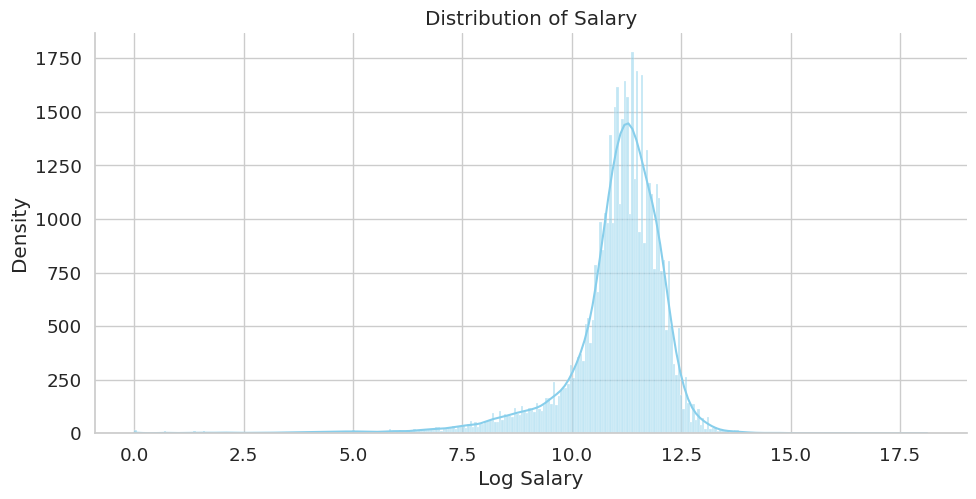

In [47]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log Salary', ylabel='Density')
plt.show()


In [48]:
Q1 = df['Salary'].quantile(0.25)
Q2 = df['Salary'].quantile(0.50)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= low) & (df['Salary'] <= high)]

In [49]:
# Dữ liệu phân bố từ 10 đến 14 nên ta lựa chọn khoảng này
df = df[df['Log_Salary'] >= 10]
df = df[df['Log_Salary'] <= 14]

<Figure size 1000x600 with 0 Axes>

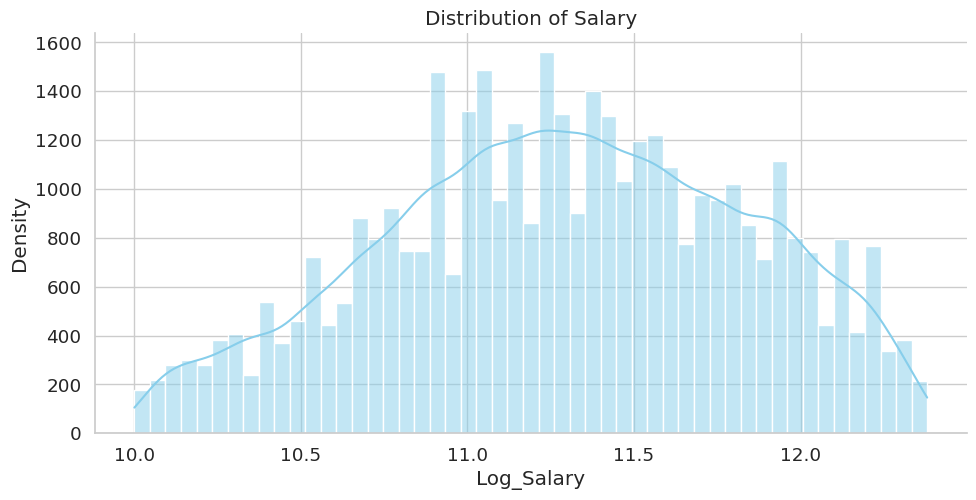

In [50]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log_Salary', ylabel='Density')
plt.show()

In [51]:
df = df.drop('Log_Salary', axis = 1)

## EDA

Load Data

In [52]:
df = pd.read_csv('../dataset/clean_data.csv')

### RemoteWork

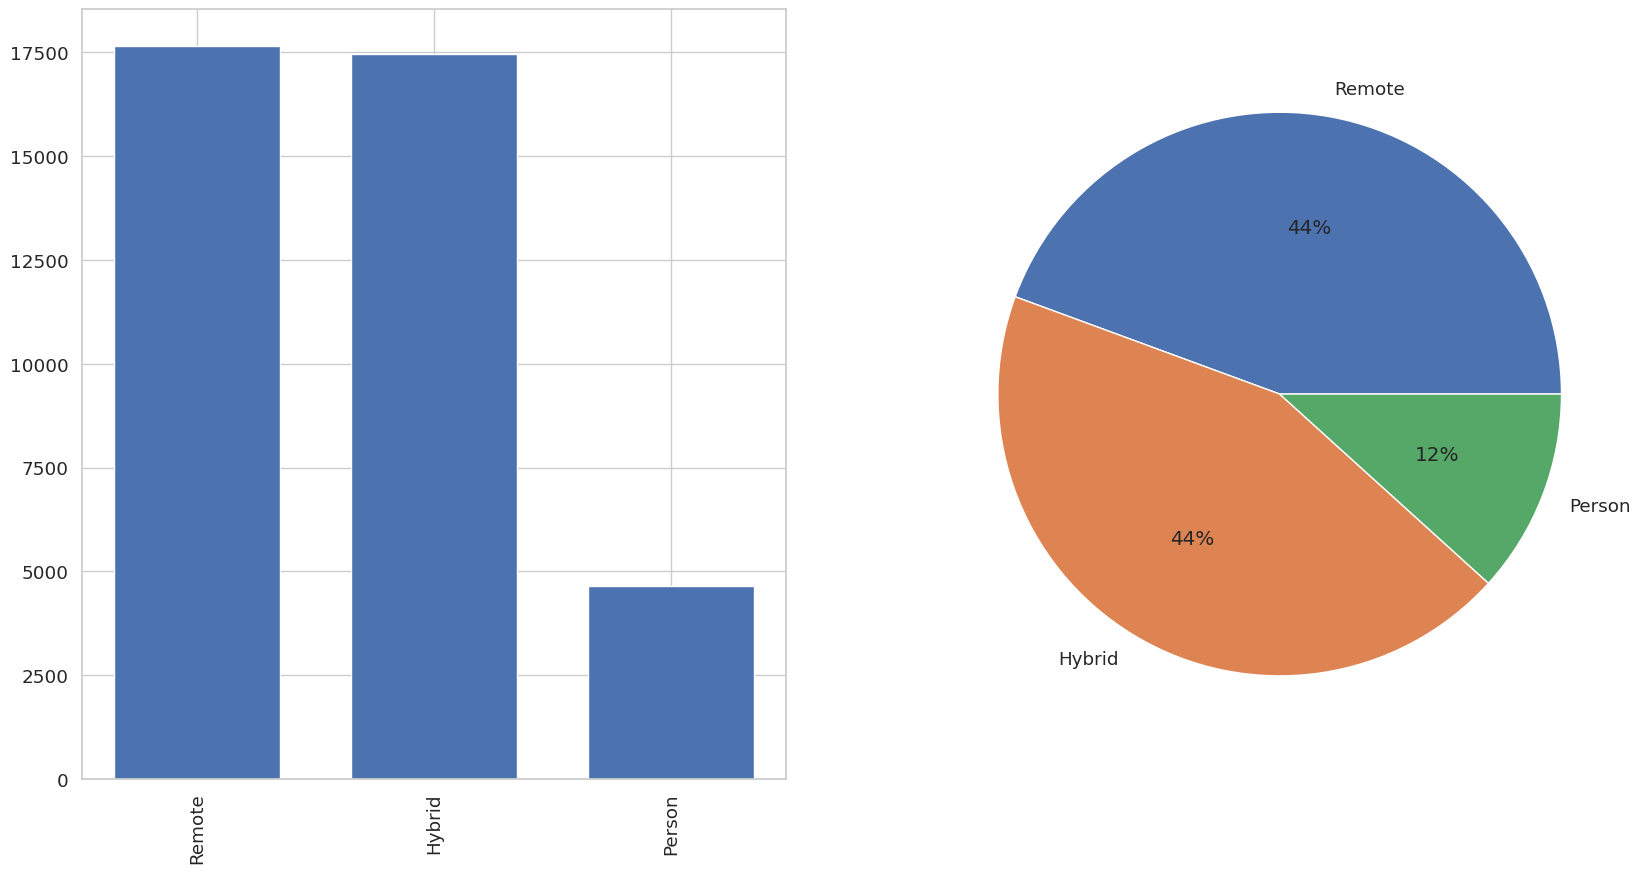

In [53]:
remote = df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### EdLevel

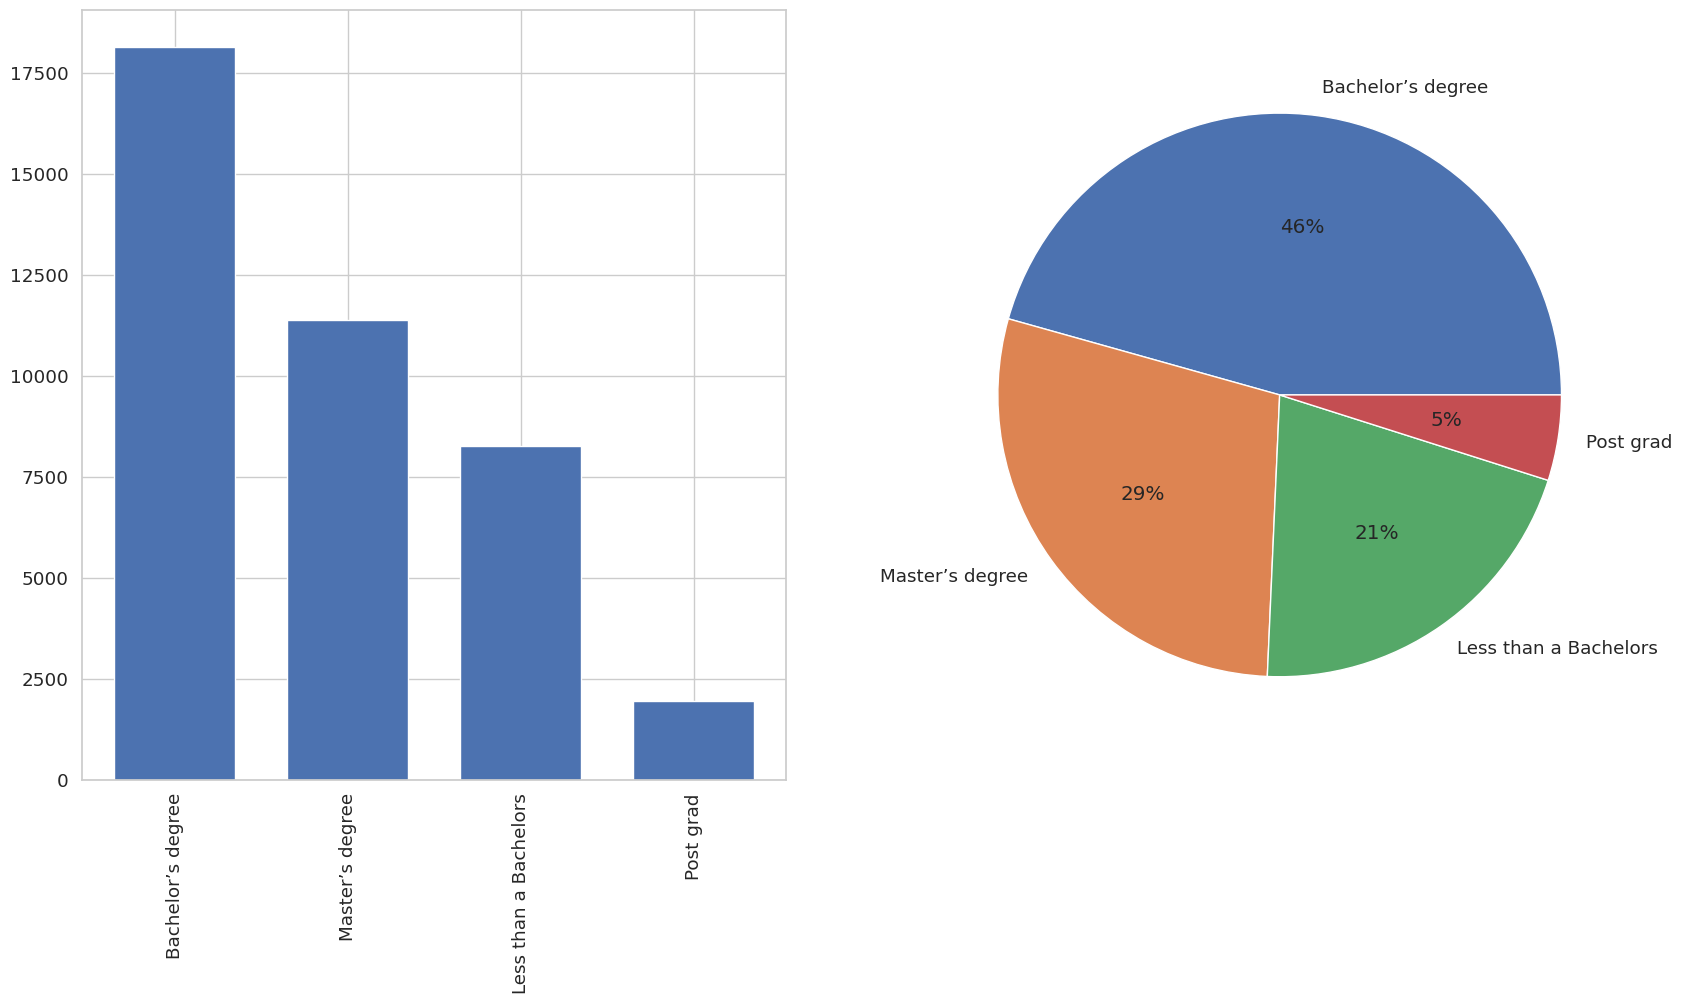

In [54]:
ed = df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### YearsCodePro

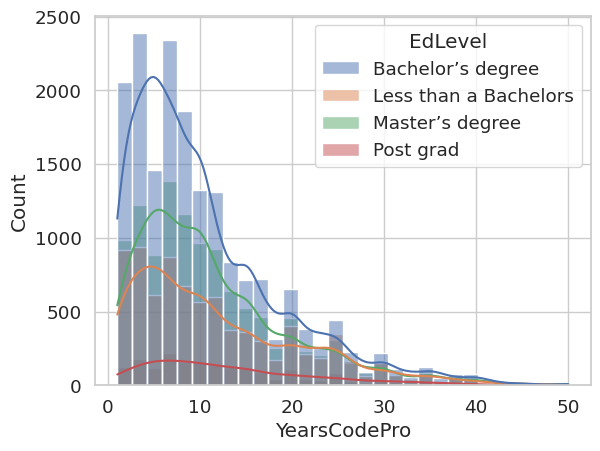

In [55]:
sns.histplot(data=df, x="YearsCodePro", hue="EdLevel", kde=True, bins=30)
plt.show()

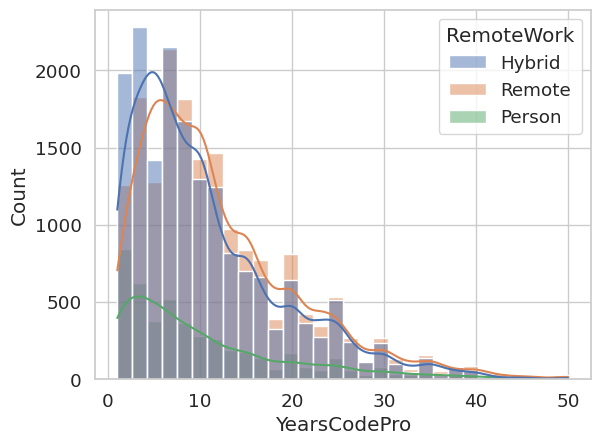

In [56]:
sns.histplot(data=df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

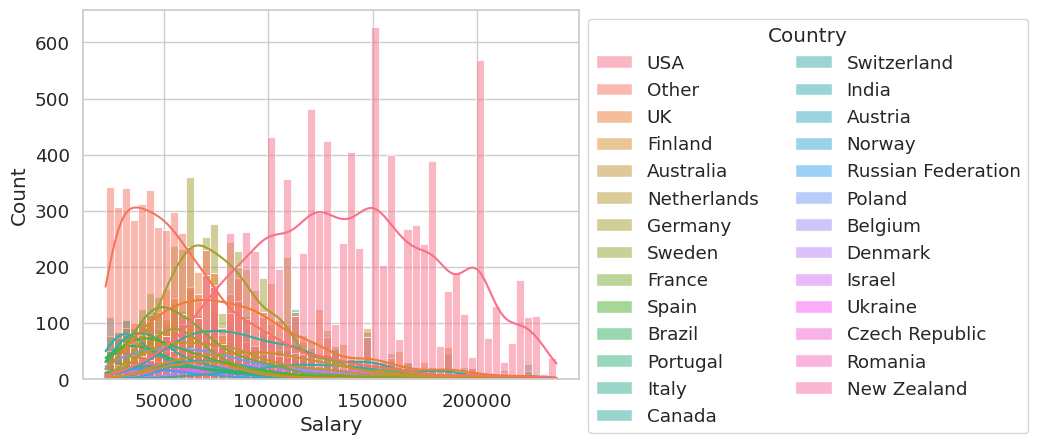

In [87]:
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2)  

plt.show()

### DevType

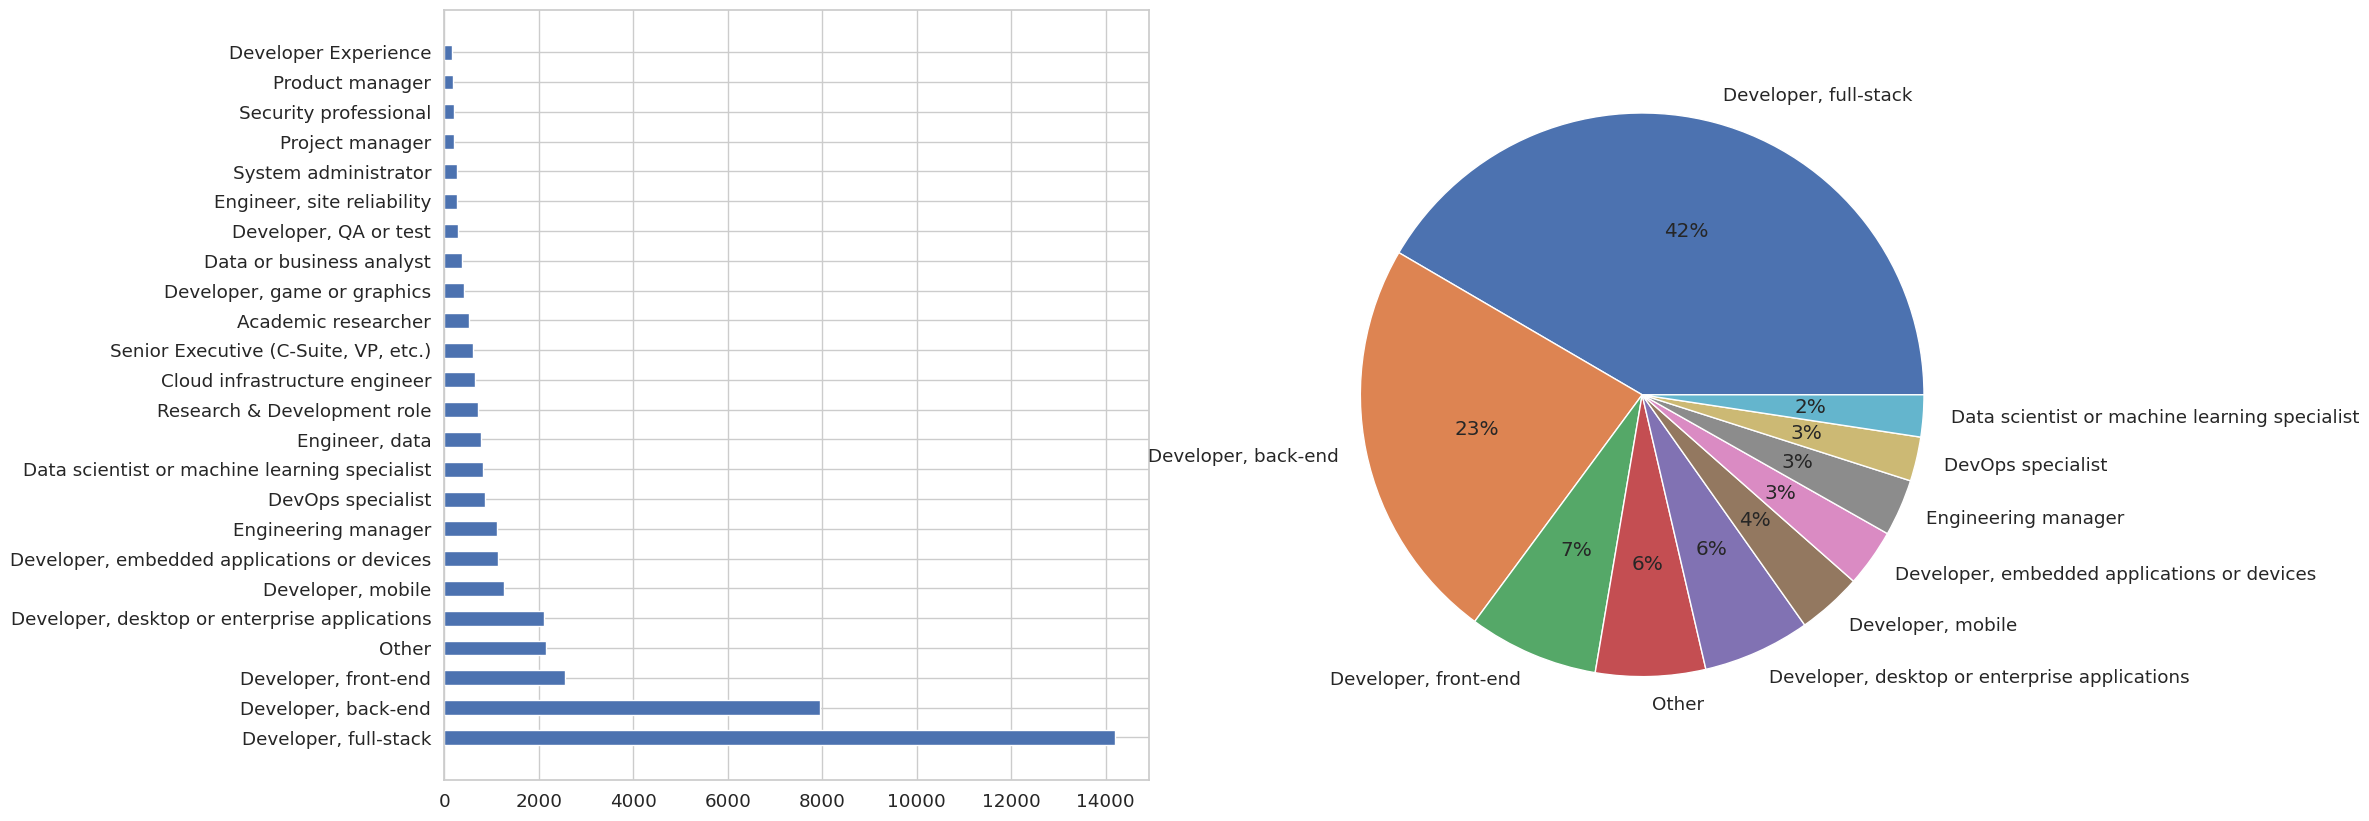

In [85]:
Dev_Type = df['DevType'].value_counts()

label = Dev_Type.index
value = Dev_Type.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.barh(label, value, height=0.5)
plt.yticks(rotation=0)

# Pie chart với top 10
plt.subplot(1,2,2)
plt.pie(x=value[:10], labels=label[:10], autopct='%.0f%%')


plt.show()

### Country

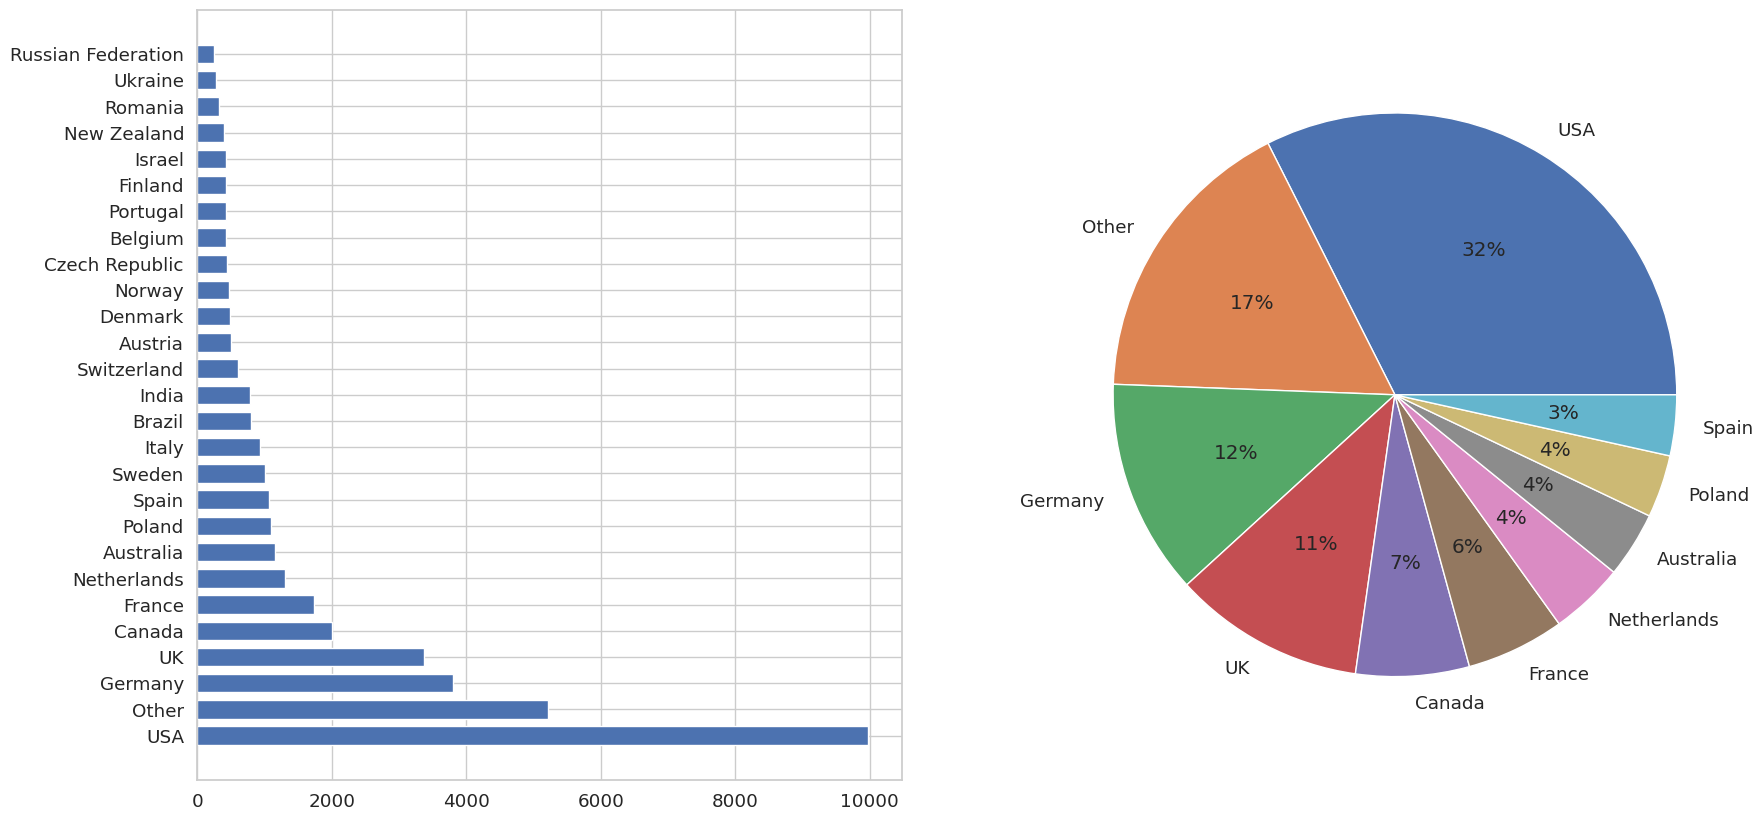

In [84]:
country = df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))  

plt.subplot(1, 2, 1)
plt.barh(label, value, height=0.7)  
plt.yticks(rotation=0)  

# Pie chart với top 10
plt.subplot(1, 2, 2)
plt.pie(x=value[:10], labels=label[:10], autopct='%.0f%%')

plt.show()


### Age

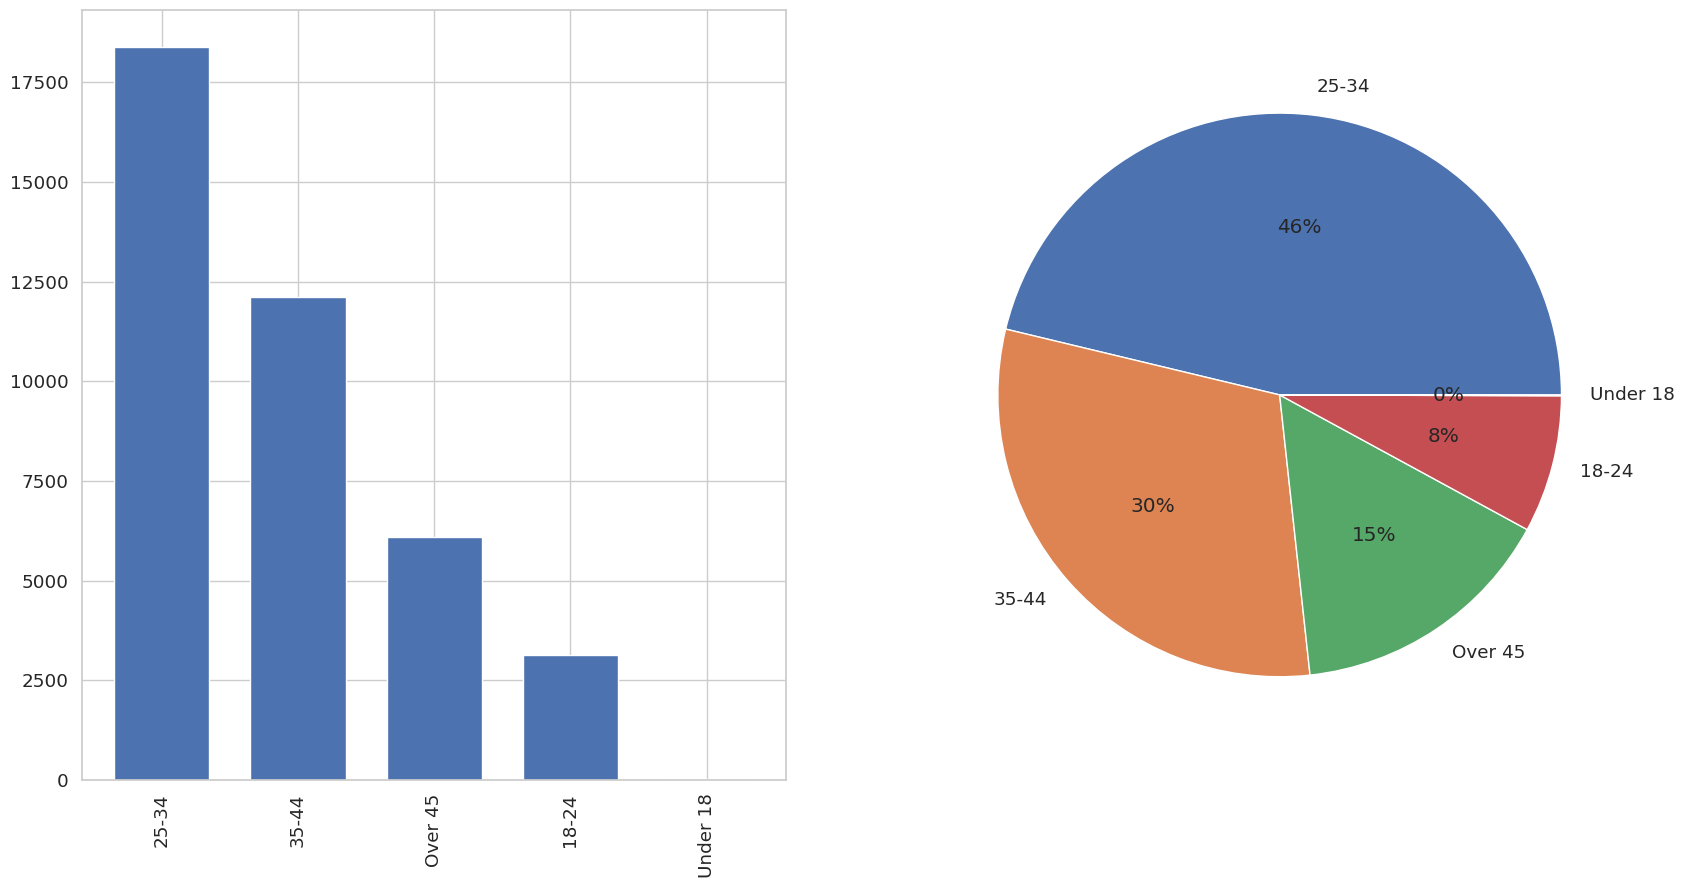

In [60]:
age = df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### LanguageHaveWorkedWith

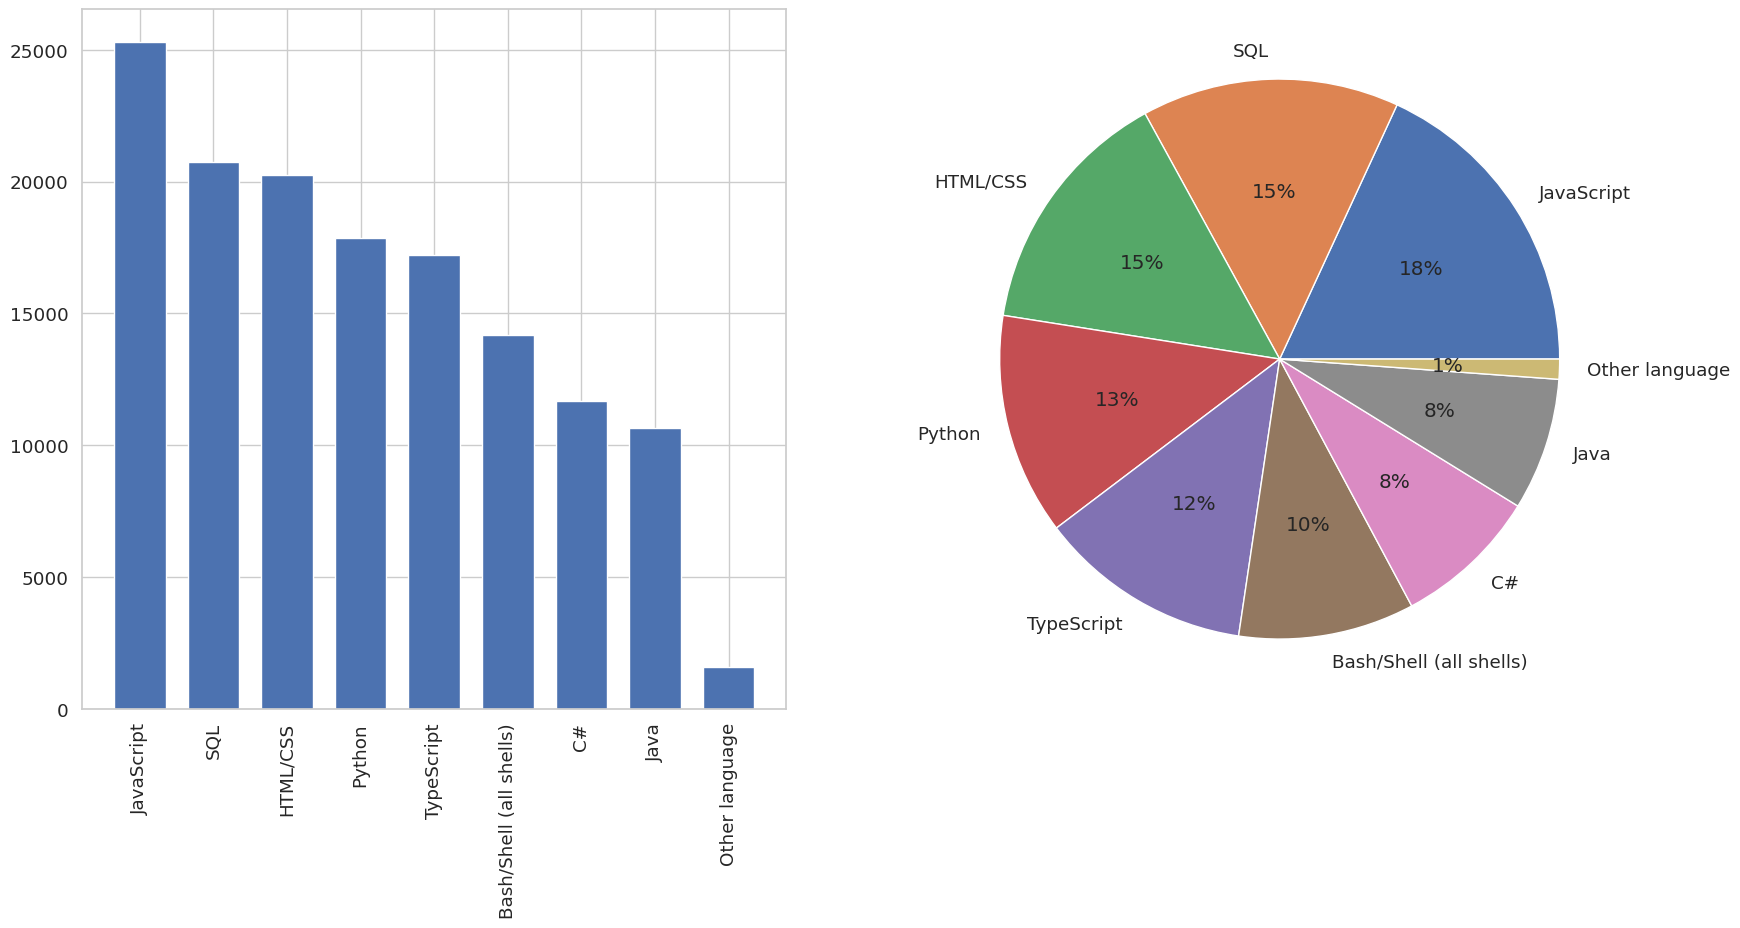

In [61]:
language = df[selected_language]

sum_values = language.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### DatabaseHaveWorkedWith

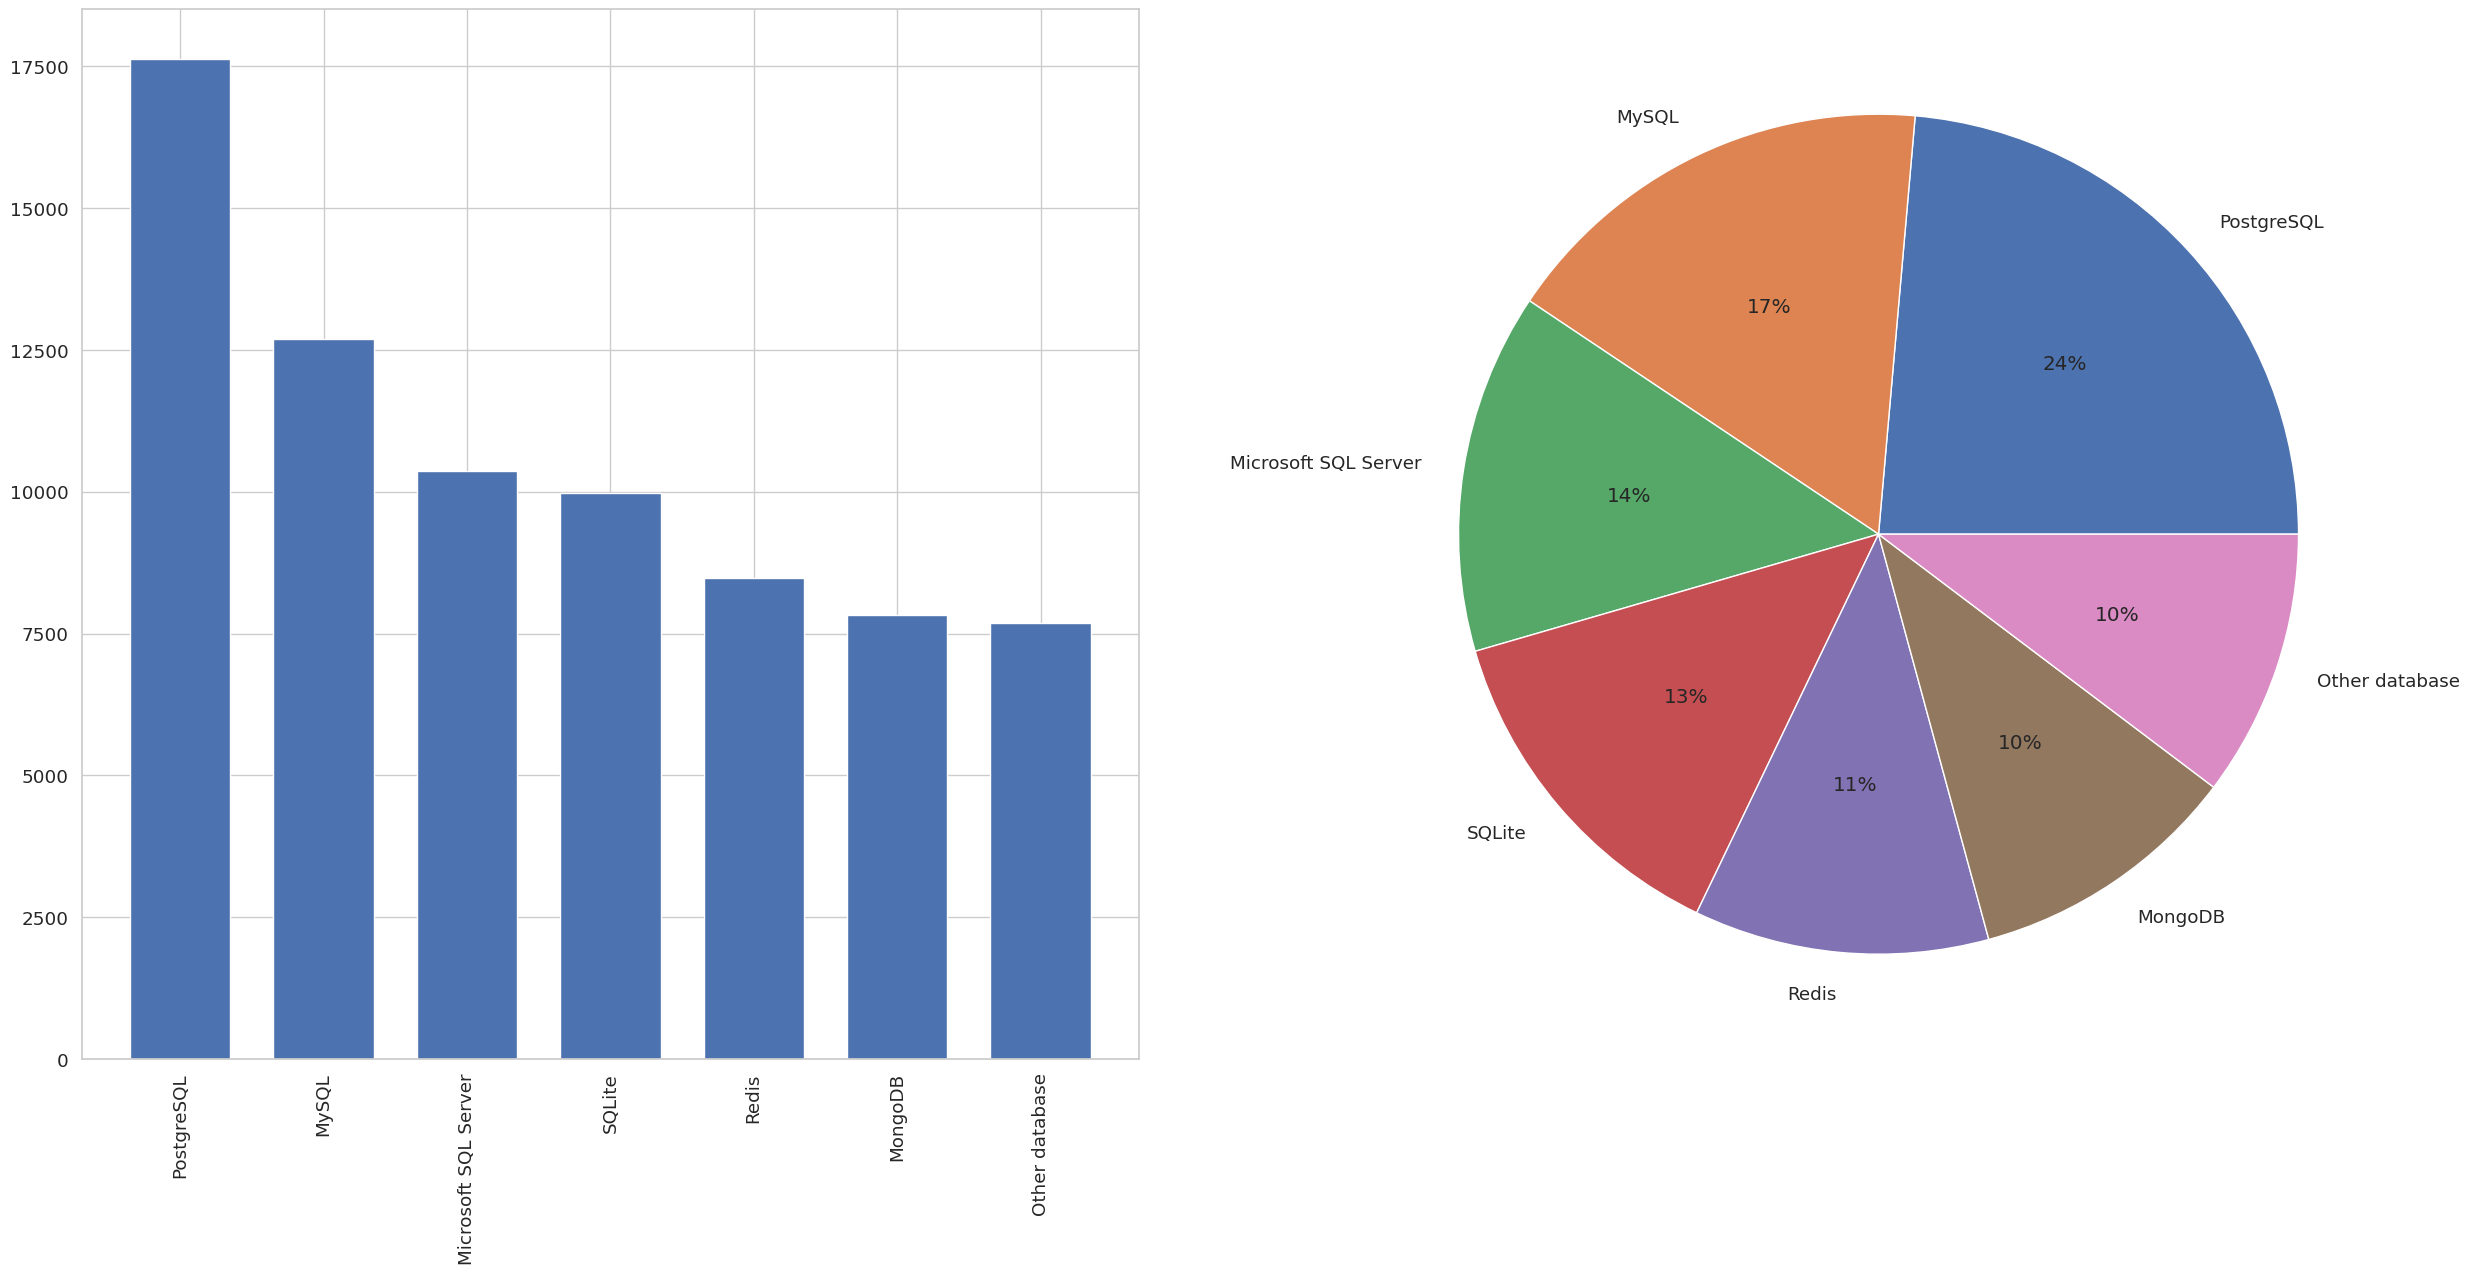

In [62]:
database = df[selected_database]

sum_values = database.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')


plt.show()

### PlatformHaveWorkedWith

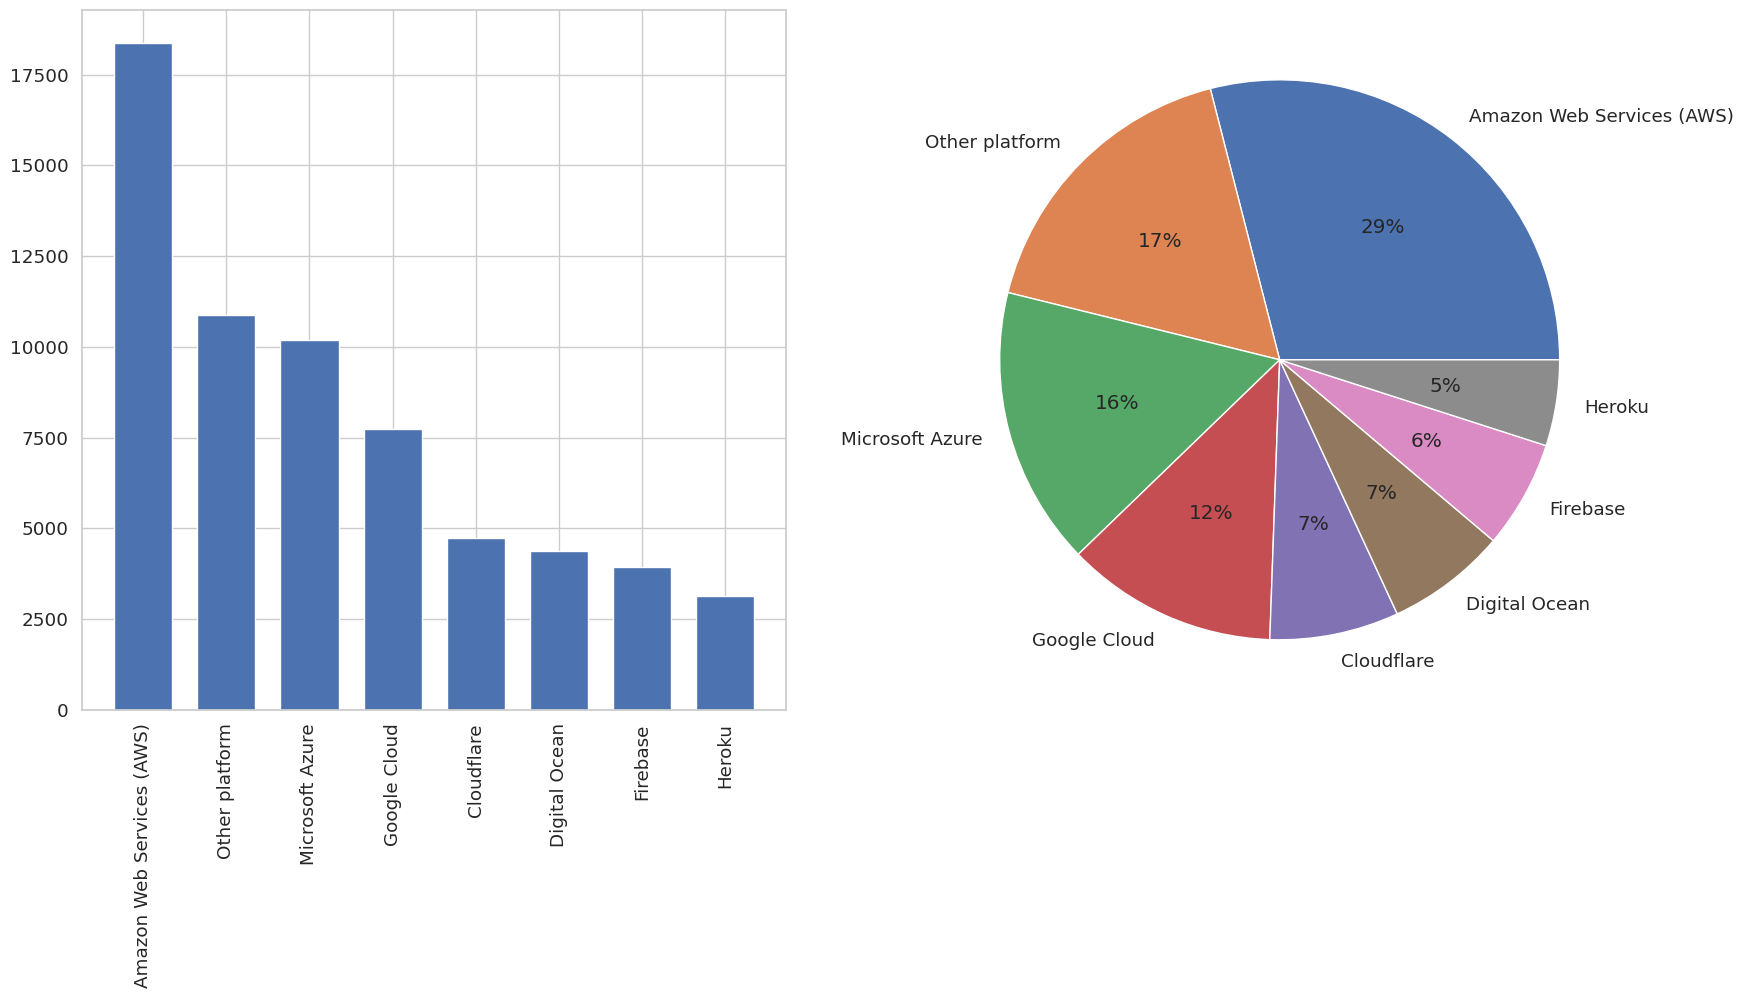

In [63]:
platform = df[selected_platform]

sum_values = platform.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### ToolsTechHaveWorkedWith

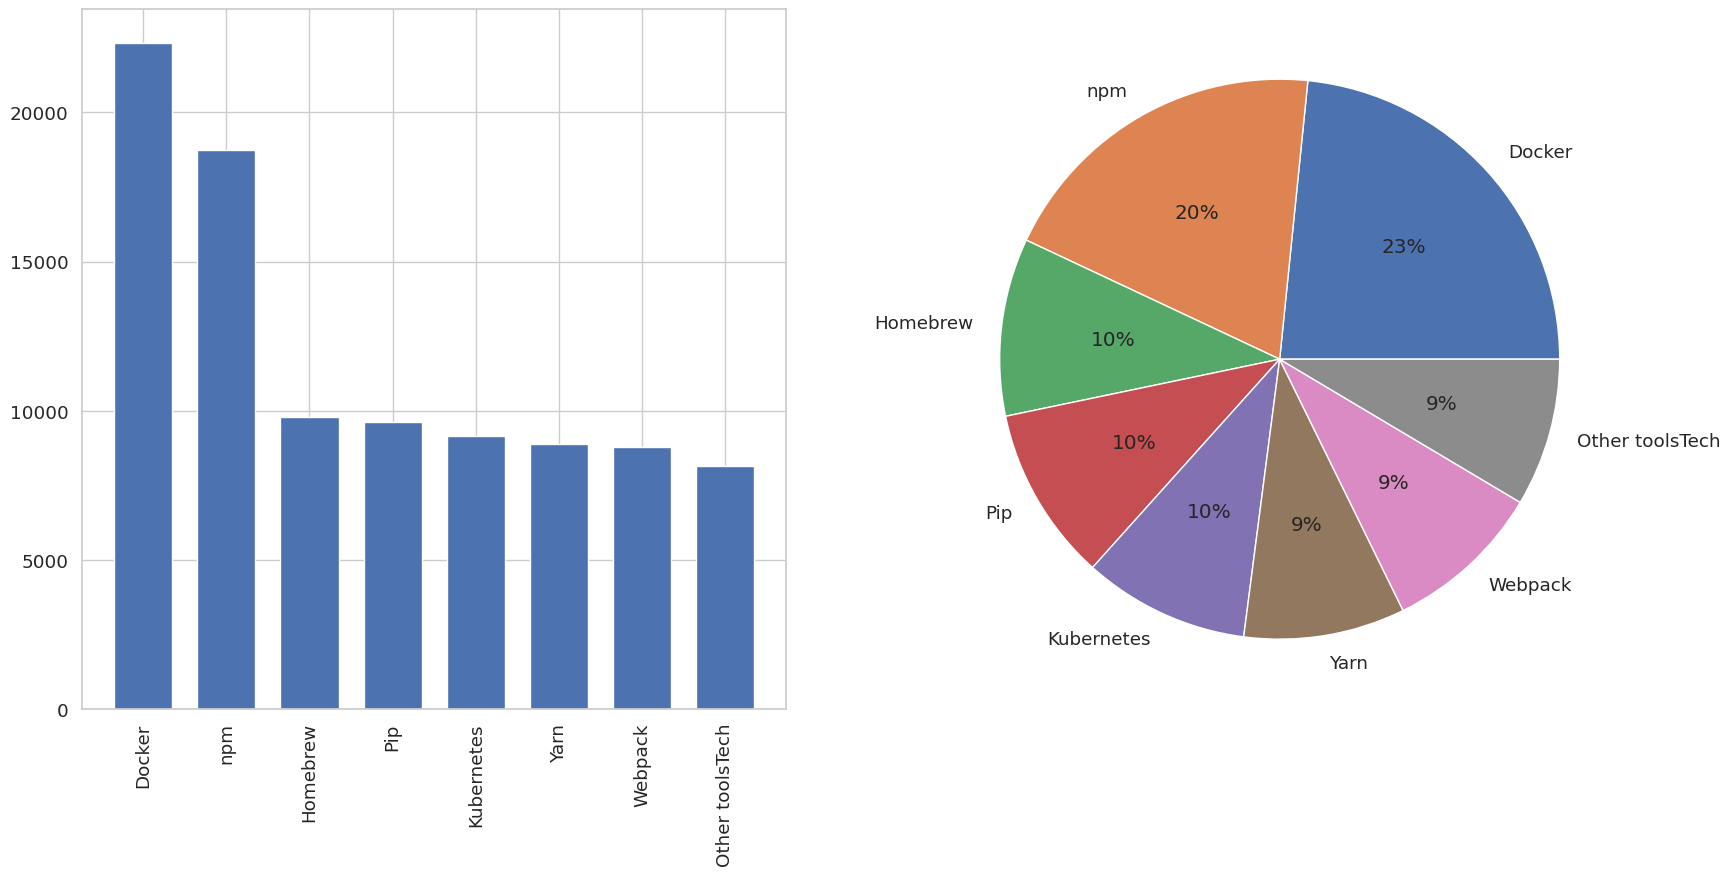

In [64]:
toolsTech = df[selected_toolsTech]

sum_values = toolsTech.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### NEWCollabToolsHaveWorkedWith

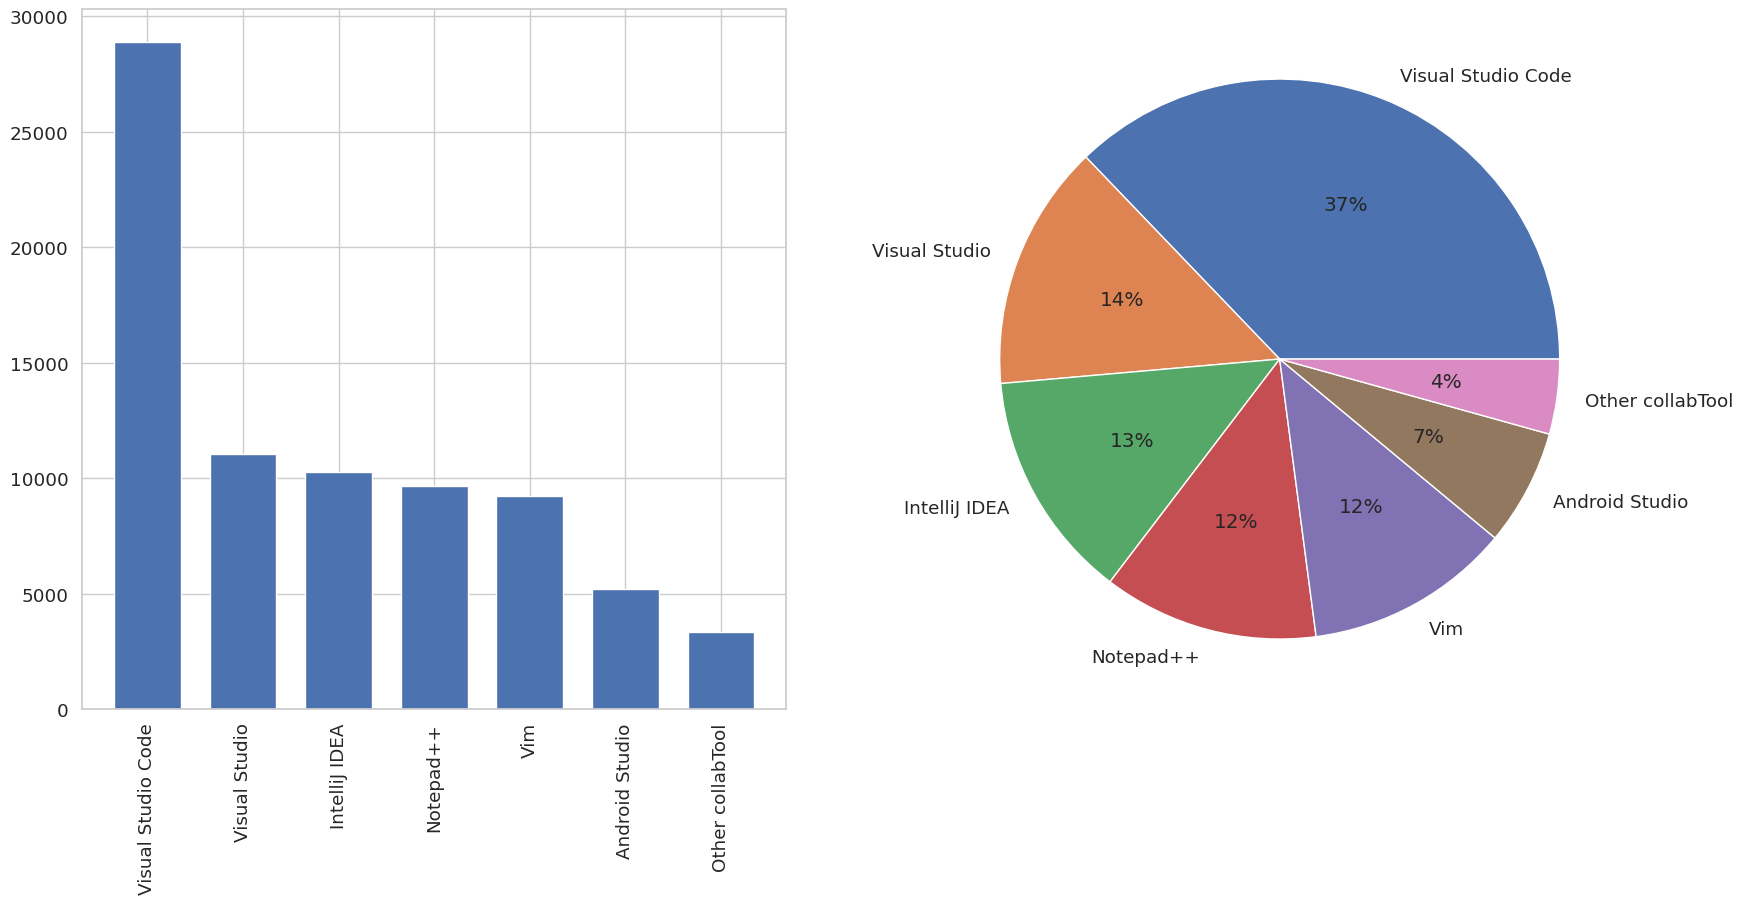

In [65]:
collabTool = df[selected_collabTool]

sum_values = collabTool.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

## Salary

### Salary & Country

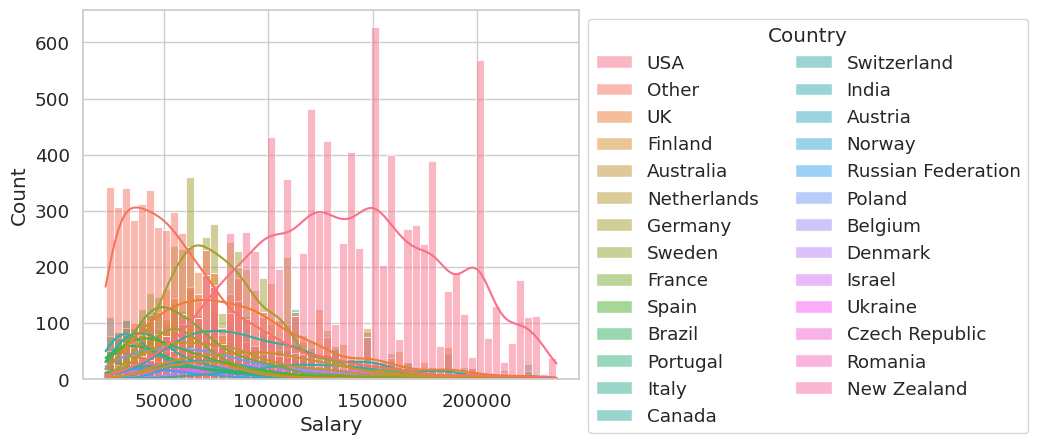

In [66]:
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2)  
plt.show()

/tmp/ipykernel_23965/1022166749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)
/tmp/ipykernel_23965/1022166749.py:10: UserWarning: 
The palette list has fewer values (12) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)


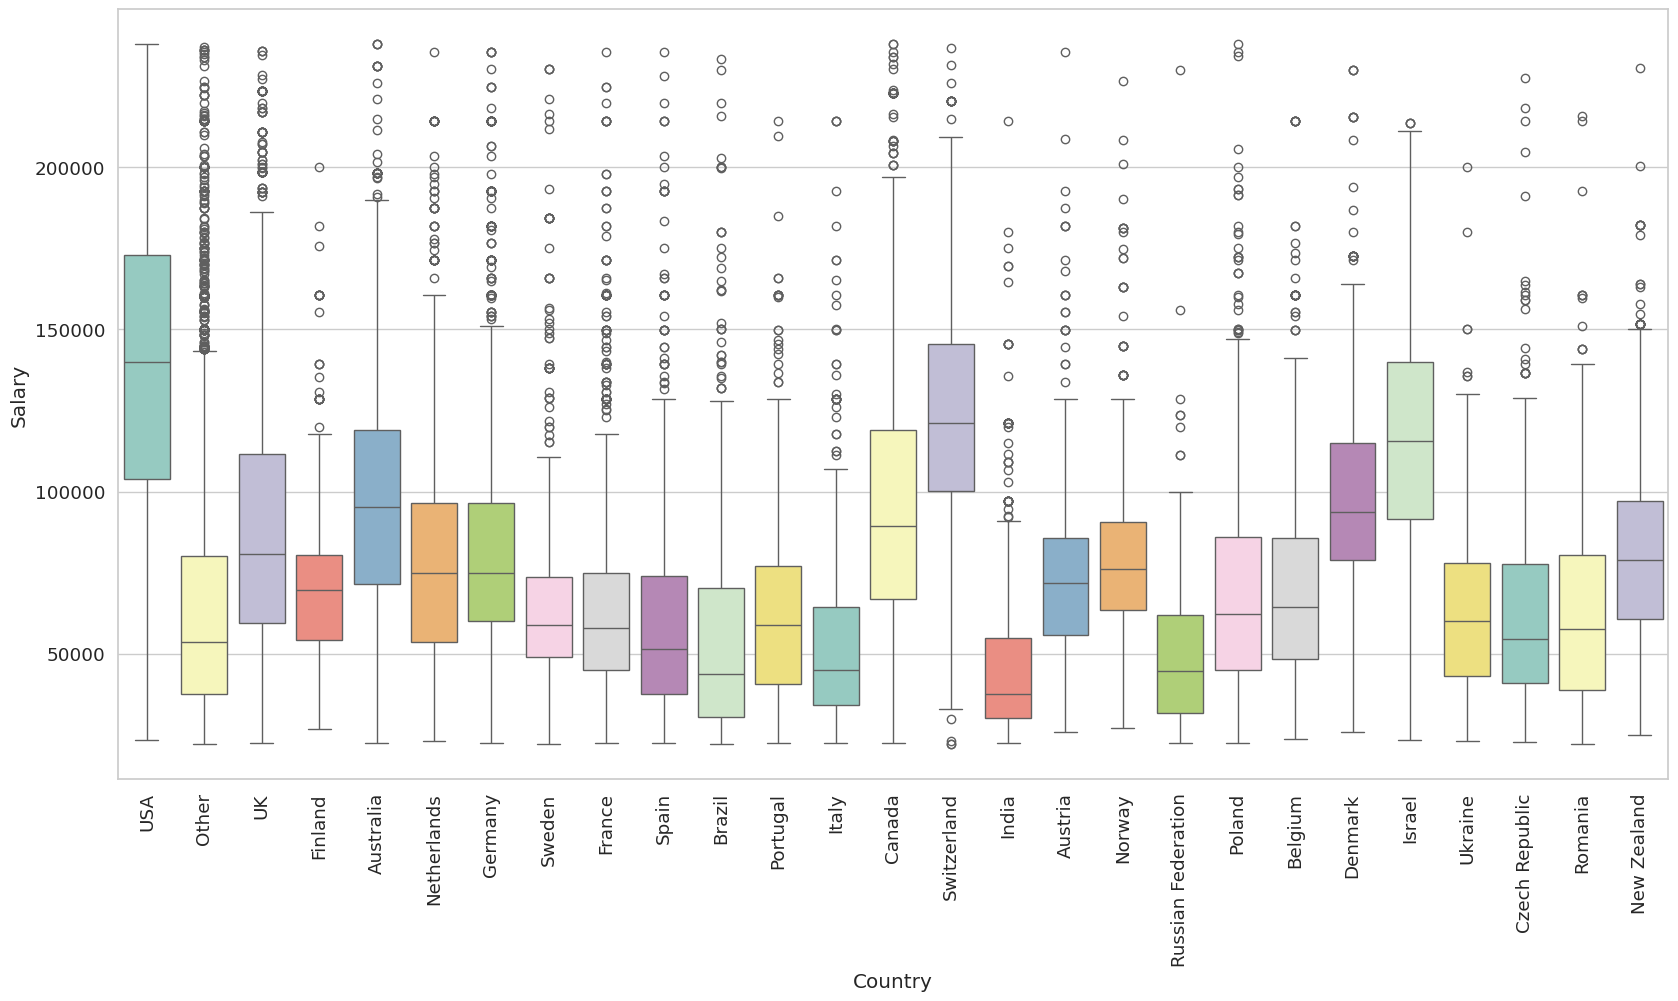

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]

boxplot_palette = sns.color_palette("Set3")  

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)
plt.xticks(rotation=90)
plt.show()


### Salary & Age

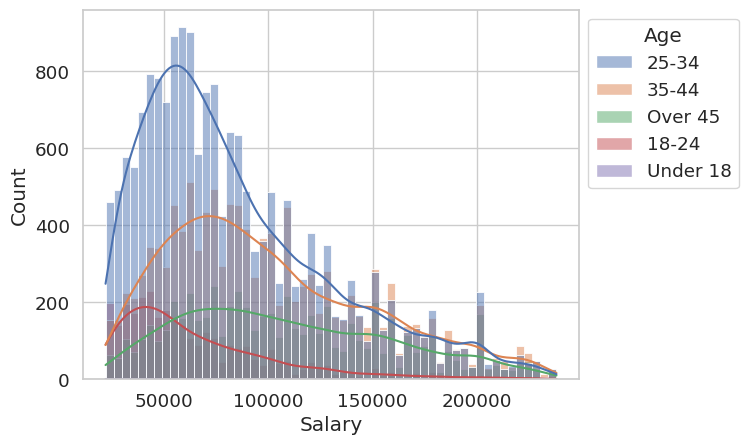

In [68]:
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Salary & EdLevel

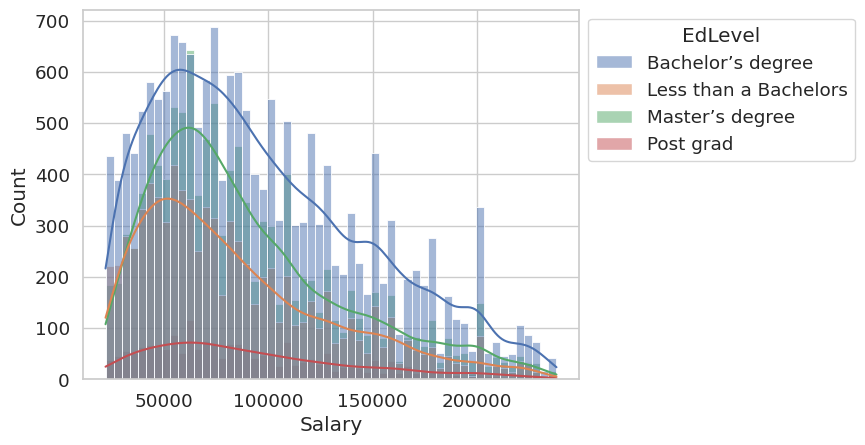

In [69]:
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

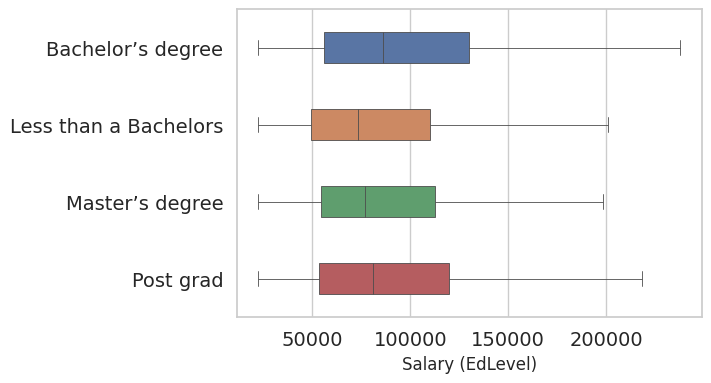

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
dft = df[["EdLevel", "Salary"]]

sns.boxplot(x='Salary', y='EdLevel', data=dft, order=['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree', 'Post grad'],
            showfliers=False, hue='EdLevel', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary (EdLevel)", fontsize=12)
ax.set_ylabel("")
#plt.suptitle("Boxplot: Listing Salary by EdLevel", fontweight="bold", fontsize=16)

# Đặt kích thước cho nhãn trục y và x
for label in ax.yaxis.get_majorticklabels():
    label.set_size(14)
for label in ax.xaxis.get_majorticklabels():
    label.set_size(14)

plt.show()


### Salary & RemoteWork

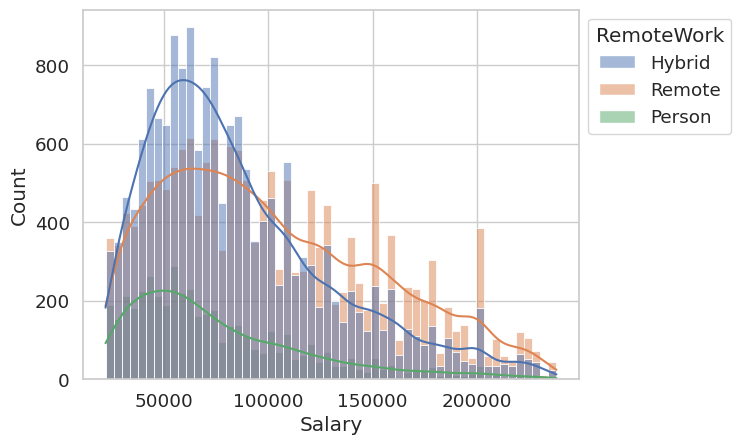

In [71]:
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

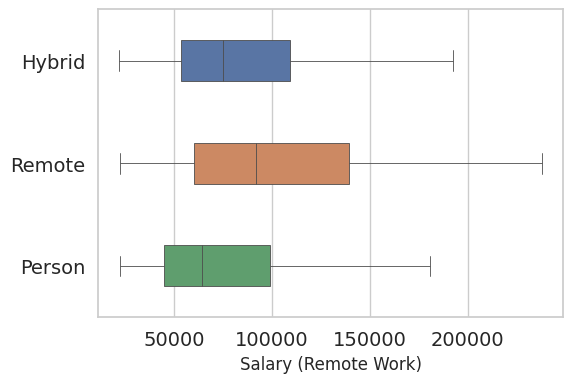

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
dft = df[["RemoteWork", "Salary"]]

sns.boxplot(x='Salary', y='RemoteWork', data=dft,
            showfliers=False, hue='RemoteWork', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary (Remote Work)", fontsize=12)
ax.set_ylabel("")

# Đặt kích thước cho nhãn trục y và x
for label in ax.yaxis.get_majorticklabels():
    label.set_size(14)
for label in ax.xaxis.get_majorticklabels():
    label.set_size(14)

plt.show()


### Salary & DevType

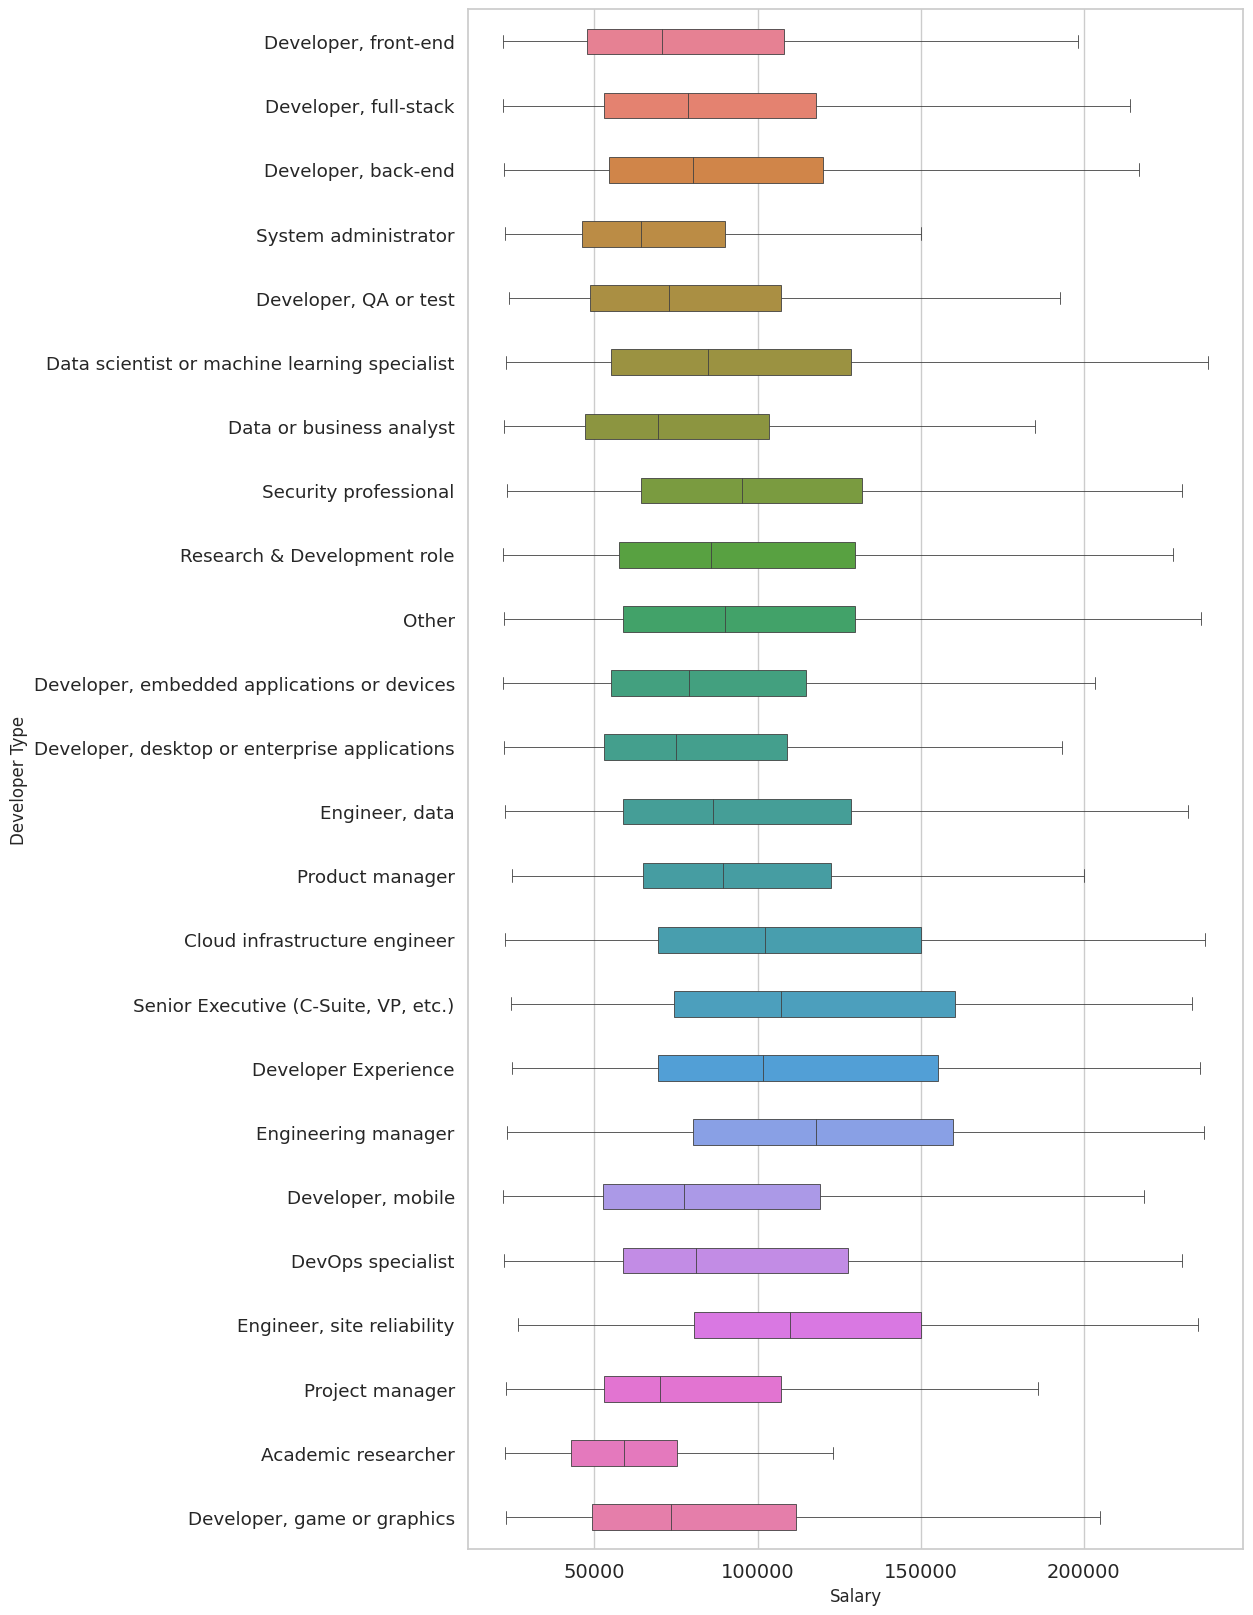

In [73]:
plt.figure(figsize=(10, 20))
dft = df[["DevType", "Salary"]]

sns.boxplot(x='Salary', y='DevType', data=dft,
            showfliers=False, hue='DevType', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary", fontsize=12)
ax.set_ylabel("Developer Type", fontsize=12)

for tick in ax.yaxis.get_major_ticks():
    tick.label2.set_fontsize(14)  # Sử dụng label2 thay vì label

# Thử truy cập trực tiếp vào đối tượng Text của nhãn x-axis
for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(14)

plt.show()


### Salary & Languages

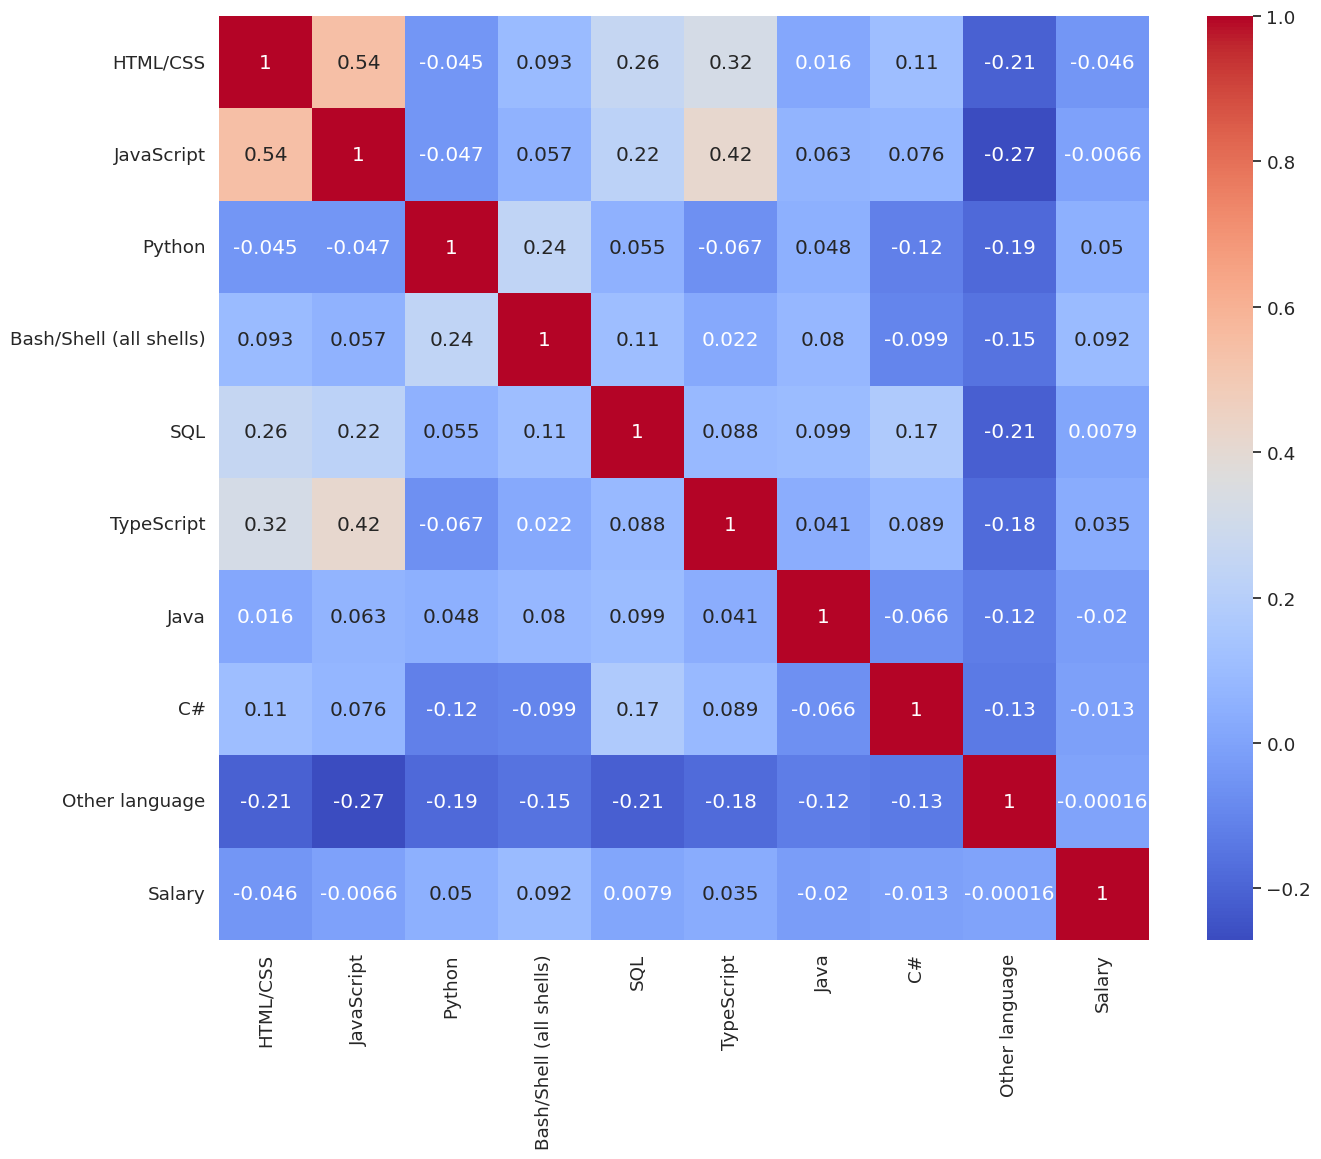

In [74]:
selected_heatmap = selected_language + ['Salary']
plt.figure(figsize=(15,12))
sns.heatmap(df[selected_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

### Salary & Databases

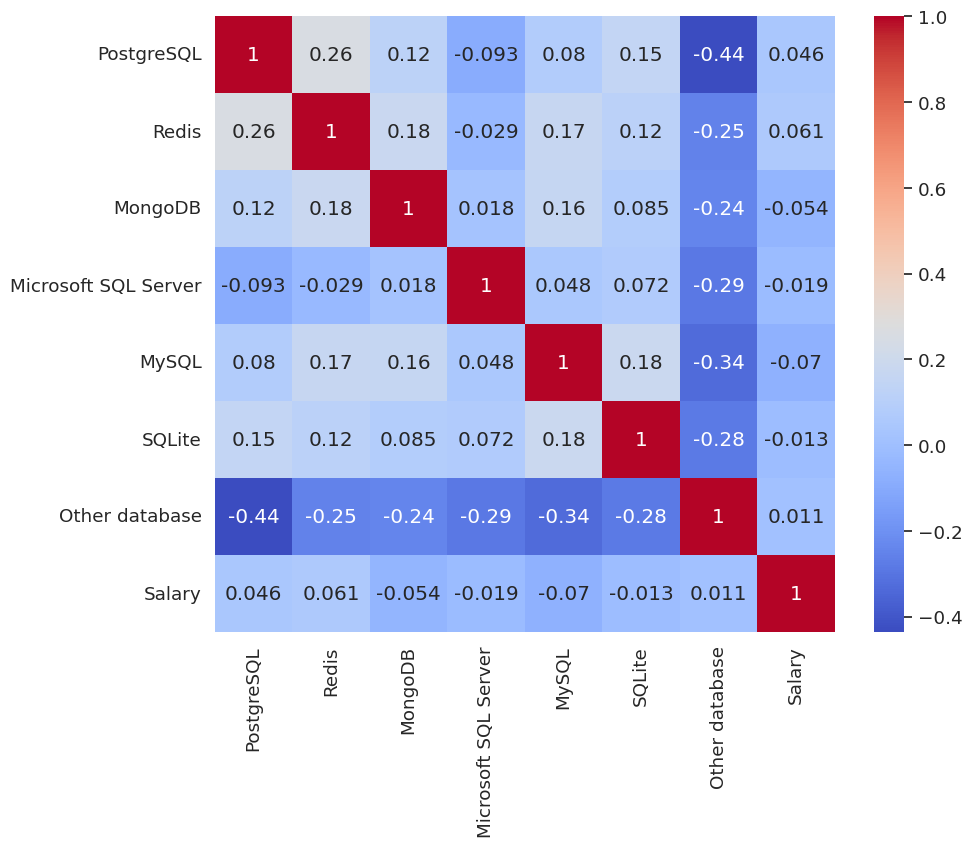

In [75]:
selected_heatmap = selected_database + ['Salary']
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

### Salary & Platforms

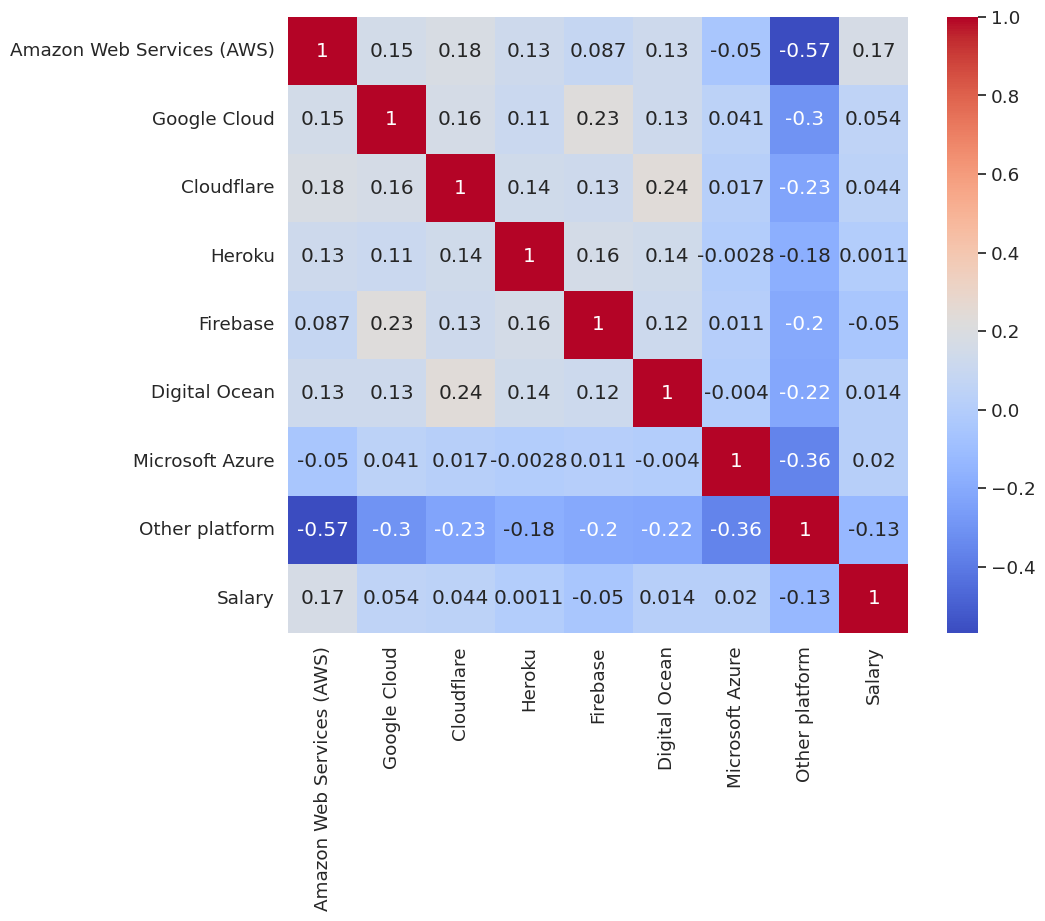

In [76]:
selected_heatmap = selected_platform + ['Salary']
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

### Salary & ToolsTechs

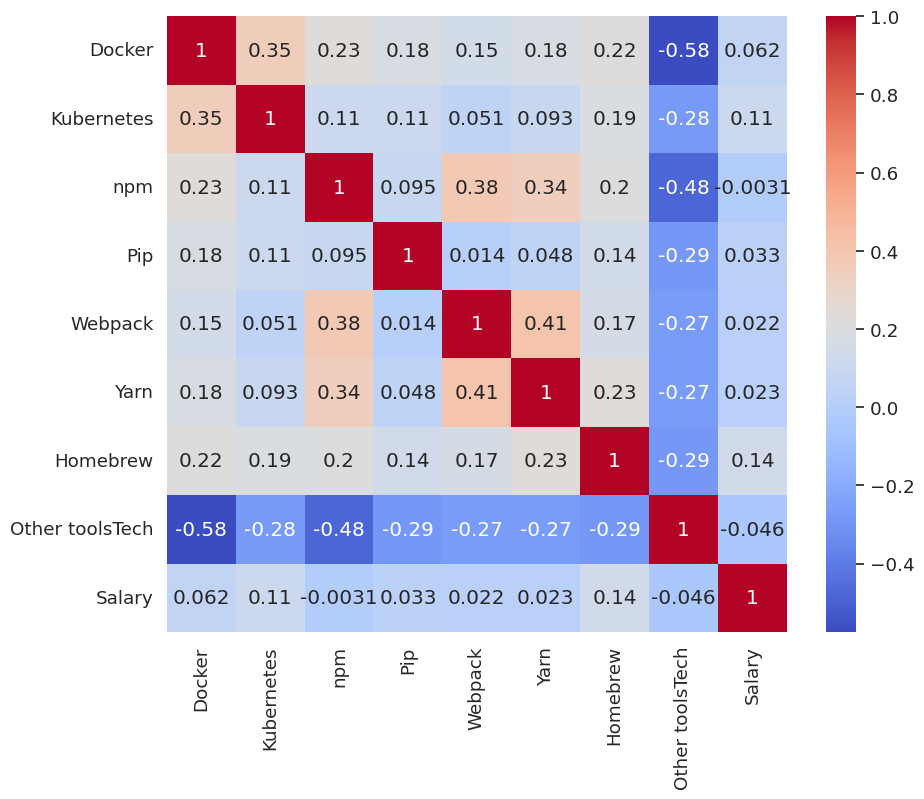

In [77]:
selected_heatmap = selected_toolsTech + ['Salary']
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

### Salary & CollabTools

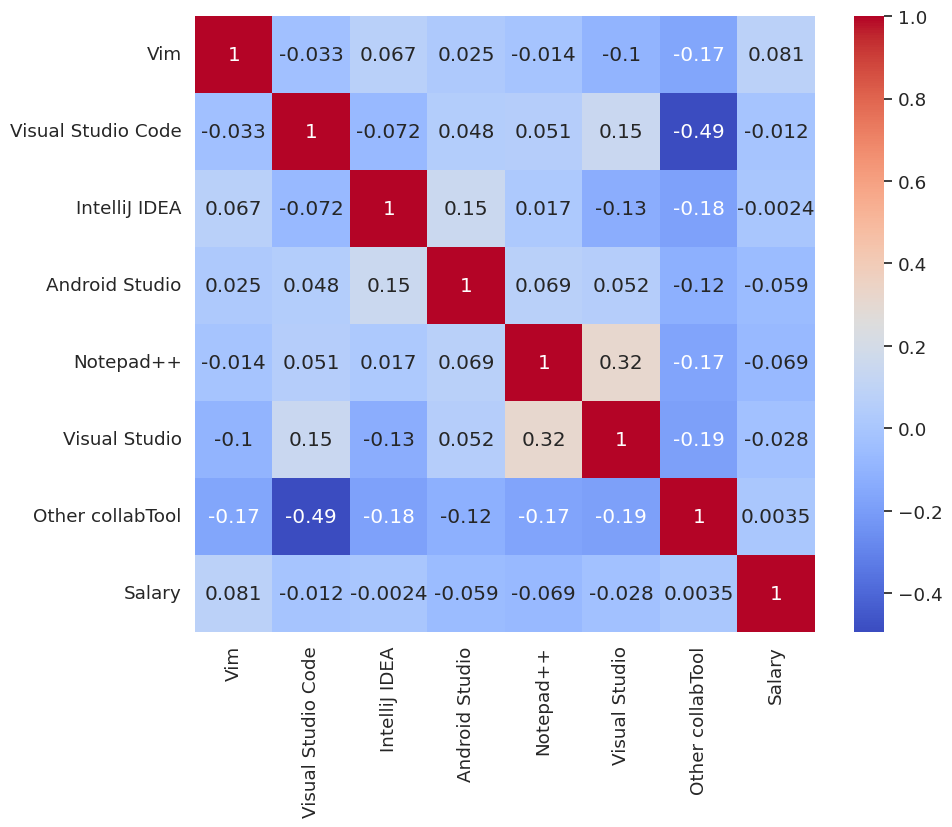

In [78]:
selected_heatmap = selected_collabTool + ['Salary']
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

## **Website dự đoán**
<h1 align="center">
  <strong>Quét mã QR dưới đây hoặc nhập link</strong>
  <br>
</h1>

<p align="center">
  <br>  <img src="../app/static/qr.svg" alt="Logo OpenAI" width="600" height="600">
  <br>
</p>
